In [1]:
import pandas as pd
#numerical combination
import numpy as np 
#plotting data and create visualization
import matplotlib.pyplot as plt           
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

from xgboost import XGBClassifier
from xgboost import plot_importance
file ='RiskFactors.csv'

In [2]:
df = pd.read_csv(file)

In [3]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
5,1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
9,0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55394 entries, 0 to 55393
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 55394 non-null  int64
 1   AGE                    55394 non-null  int64
 2   SMOKING                55394 non-null  int64
 3   YELLOW_FINGERS         55394 non-null  int64
 4   ANXIETY                55394 non-null  int64
 5   PEER_PRESSURE          55394 non-null  int64
 6   CHRONIC_DISEASE        55394 non-null  int64
 7   FATIGUE                55394 non-null  int64
 8   ALLERGY                55394 non-null  int64
 9   WHEEZING               55394 non-null  int64
 10  ALCOHOL_CONSUMING      55394 non-null  int64
 11  COUGHING               55394 non-null  int64
 12  SHORTNESS_OF_BREATH    55394 non-null  int64
 13  SWALLOWING_DIFFICULTY  55394 non-null  int64
 14  CHEST_PAIN             55394 non-null  int64
 15  LUNG_CANCER            55394 non-nul

In [5]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000
mean,0.502004,44.137614,1.499531,1.496299,1.500614,1.496769,1.501047,1.497924,1.501914,1.501065,1.498447,1.505055,1.500758,1.499964,1.501643,1.496101
std,0.500000,15.309217,0.500004,0.499991,0.500004,0.499994,0.500003,0.500000,0.500001,0.500003,0.500002,0.499979,0.500004,0.500005,0.500002,0.499989
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b7a934e50>,
      dtype=object)

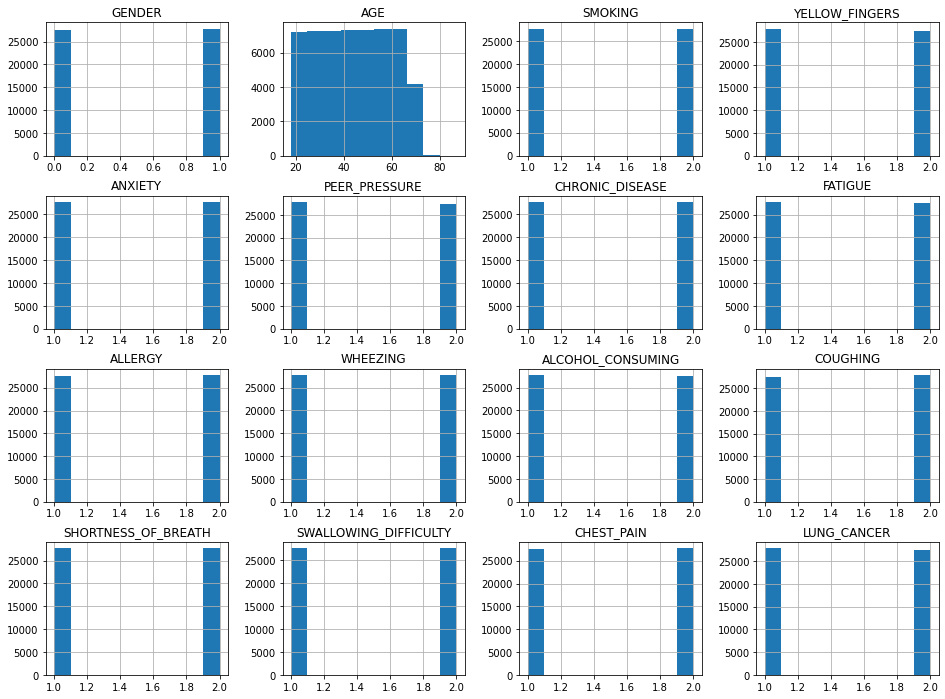

In [7]:
df.hist(figsize=(16,12))

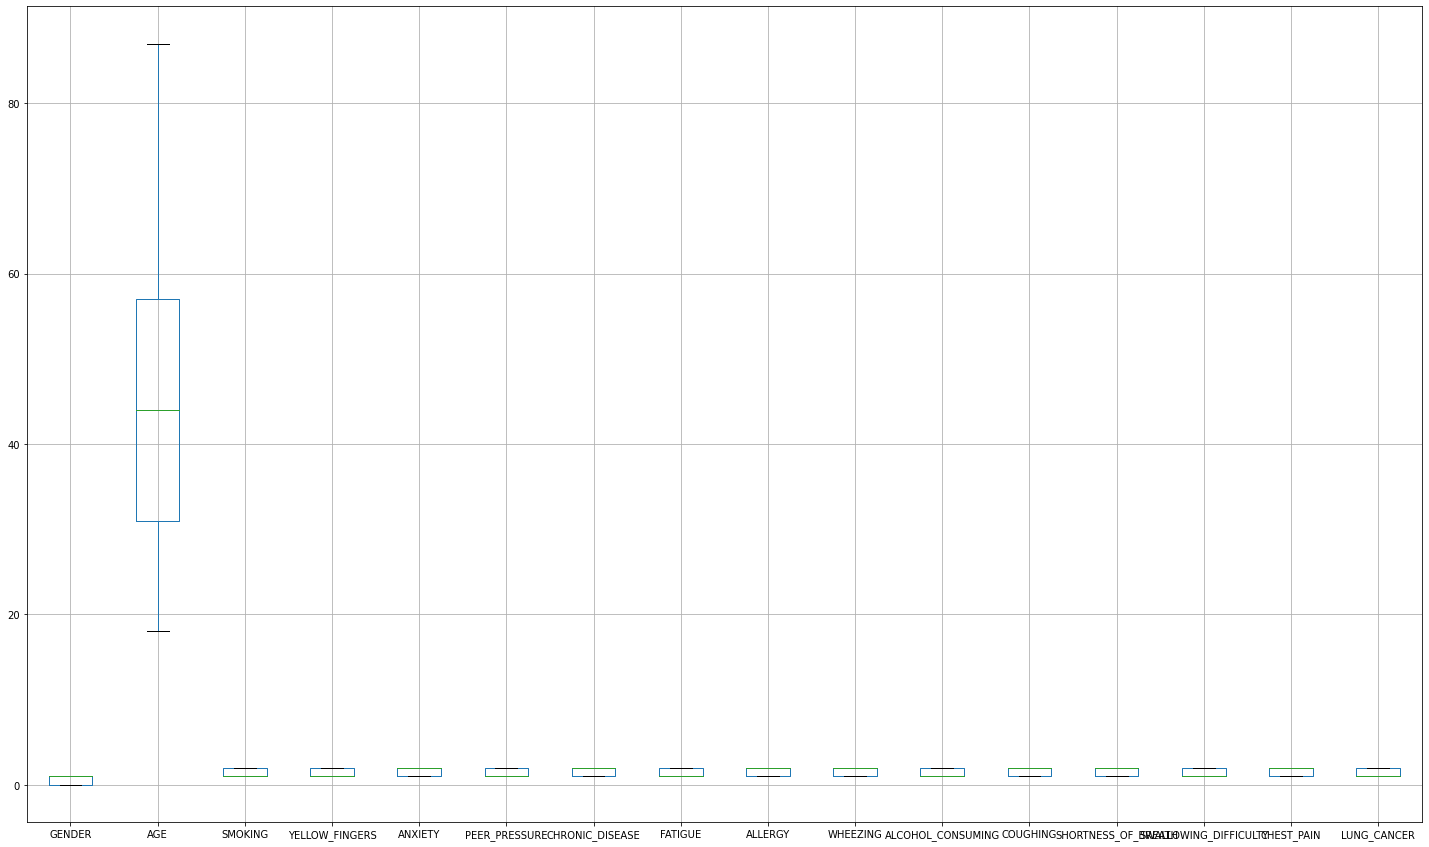

In [8]:
df.boxplot(figsize=(25,15))

In [9]:
y= df.LUNG_CANCER

In [10]:
x=df.drop('LUNG_CANCER',axis=1)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
x_train.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000
mean,0.501862,44.090962,1.500463,1.497281,1.500327,1.496672,1.501252,1.498341,1.501929,1.502042,1.498680,1.506104,1.500711,1.500102,1.504479
std,0.500002,15.311329,0.500005,0.499998,0.500006,0.499995,0.500004,0.500003,0.500002,0.500001,0.500004,0.499968,0.500005,0.500006,0.499986
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [13]:
#!pip install tensorflow_data_validation

In [14]:
import tensorflow_data_validation as tfdv

In [15]:
print('TFDV version: {}'.format(tfdv.version.__version__))
#visualize data
data = tfdv.generate_statistics_from_dataframe(df[['GENDER', 'AGE' , 'SMOKING' , 'YELLOW_FINGERS' , 'ANXIETY' ,'PEER_PRESSURE' , 'CHRONIC_DISEASE' , 'FATIGUE' , 'ALLERGY' , 'WHEEZING' , 'ALCOHOL_CONSUMING' , 'COUGHING' , 'SHORTNESS_OF_BREATH' , 'CHEST_PAIN']])
tfdv.visualize_statistics(data)

TFDV version: 1.12.0


In [16]:
train = tfdv.generate_statistics_from_dataframe(x_train[['GENDER', 'AGE' , 'SMOKING' , 'YELLOW_FINGERS' , 'ANXIETY' ,'PEER_PRESSURE' , 'CHRONIC_DISEASE' , 'FATIGUE' , 'ALLERGY' , 'WHEEZING' , 'ALCOHOL_CONSUMING' , 'COUGHING' , 'SHORTNESS_OF_BREATH' , 'CHEST_PAIN']])

In [17]:
test = tfdv.generate_statistics_from_dataframe(x_test[['GENDER', 'AGE' , 'SMOKING' , 'YELLOW_FINGERS' , 'ANXIETY' ,'PEER_PRESSURE' , 'CHRONIC_DISEASE' , 'FATIGUE' , 'ALLERGY' , 'WHEEZING' , 'ALCOHOL_CONSUMING' , 'COUGHING' , 'SHORTNESS_OF_BREATH' , 'CHEST_PAIN']])

In [18]:
tfdv.visualize_statistics(lhs_statistics=test, rhs_statistics=train,
                          lhs_name='TESTING_DATA', rhs_name='TRAINING_DATA')

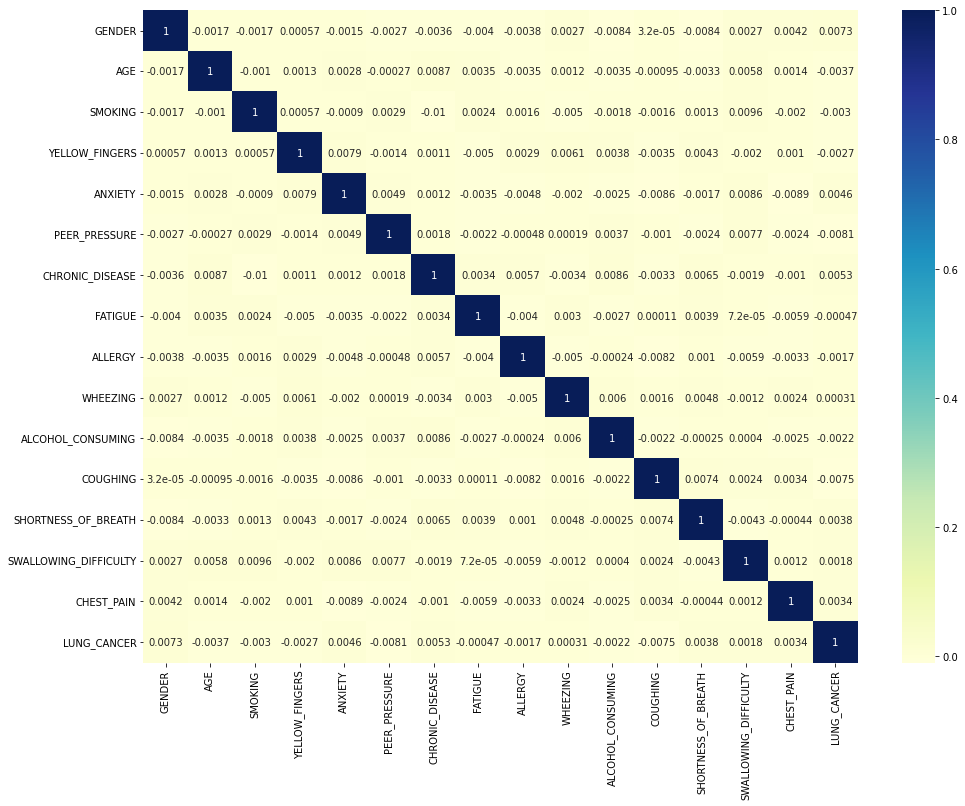

In [19]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [20]:
df.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,-0.001740,-0.001729,0.000571,-0.001521,-0.002682,-0.003619,-0.003991,-0.003843,0.002699,-0.008436,0.000032,-0.008383,0.002744,0.004211,0.007253
AGE,-0.001740,1.000000,-0.001042,0.001289,0.002827,-0.000269,0.008720,0.003498,-0.003469,0.001161,-0.003461,-0.000948,-0.003281,0.005846,0.001377,-0.003676
SMOKING,-0.001729,-0.001042,1.000000,0.000571,-0.000901,0.002882,-0.009999,0.002379,0.001556,-0.004981,-0.001844,-0.001615,0.001337,0.009568,-0.002019,-0.003004
YELLOW_FINGERS,0.000571,0.001289,0.000571,1.000000,0.007880,-0.001384,0.001099,-0.004977,0.002917,0.006118,0.003804,-0.003536,0.004272,-0.001950,0.000999,-0.002730
ANXIETY,-0.001521,0.002827,-0.000901,0.007880,1.000000,0.004918,0.001189,-0.003461,-0.004807,-0.002025,-0.002487,-0.008642,-0.001699,0.008629,-0.008886,0.004595
PEER_PRESSURE,-0.002682,-0.000269,0.002882,-0.001384,0.004918,1.000000,0.001819,-0.002229,-0.000481,0.000194,0.003735,-0.001018,-0.002373,0.007726,-0.002398,-0.008138
CHRONIC_DISEASE,-0.003619,0.008720,-0.009999,0.001099,0.001189,0.001819,1.000000,0.003403,0.005661,-0.003398,0.008563,-0.003307,0.006532,-0.001913,-0.001018,0.005324
FATIGUE,-0.003991,0.003498,0.002379,-0.004977,-0.003461,-0.002229,0.003403,1.000000,-0.003956,0.003006,-0.002685,0.000114,0.003906,0.000072,-0.005944,-0.000466
ALLERGY,-0.003843,-0.003469,0.001556,0.002917,-0.004807,-0.000481,0.005661,-0.003956,1.000000,-0.004991,-0.000241,-0.008163,0.001041,-0.005885,-0.003262,-0.001739
WHEEZING,0.002699,0.001161,-0.004981,0.006118,-0.002025,0.000194,-0.003398,0.003006,-0.004991,1.000000,0.006000,0.001567,0.004763,-0.001227,0.002412,0.000305


In [21]:
# fit Logistic Regression model to training data
lr = LogisticRegression()
lr_fit = lr.fit(x_train,y_train)

# fit Random Forest model to training data
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)

# fit XGBoost model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(x_train, y_train)

XGBClassifier()

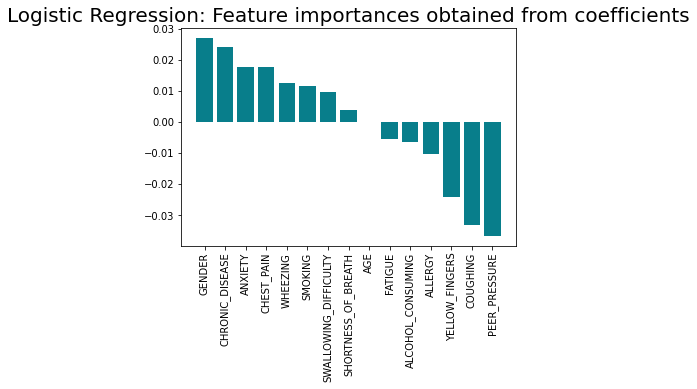

In [22]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Logistic Regression: Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

XGBOOST Feature Importances :  [0.0660983  0.06768558 0.05938423 0.05204877 0.08313112 0.03446243
 0.07311407 0.1778506  0.05436414 0.03805458 0.06973007 0.03141084
 0.07092541 0.05823326 0.0635066 ]


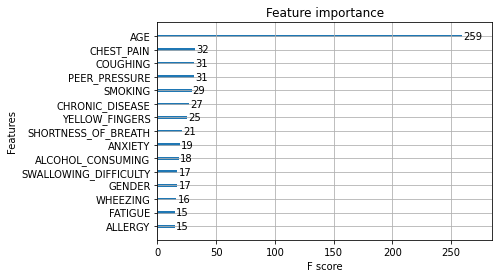

In [23]:
print("XGBOOST Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

Random Forest Feature Ranking:
1. AGE (0.511342)
2. SHORTNESS_OF_BREATH (0.039227)
3. ALCOHOL_CONSUMING (0.036550)
4. WHEEZING (0.036211)
5. FATIGUE (0.036013)
6. SWALLOWING_DIFFICULTY (0.035934)
7. CHEST_PAIN (0.035454)
8. ANXIETY (0.035093)
9. CHRONIC_DISEASE (0.034845)
10. COUGHING (0.034789)
11. SMOKING (0.033619)
12. ALLERGY (0.033550)
13. YELLOW_FINGERS (0.033225)
14. PEER_PRESSURE (0.032322)
15. GENDER (0.031826)


<BarContainer object of 15 artists>

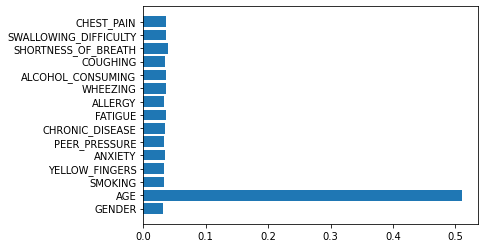

In [24]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

print('Random Forest Feature Ranking:')

for f in range(x_train.shape[1]):
  print('%d. %s (%f)'% (f+1, x_train.columns[indices[f]], importances[indices[f]]))

# plot feature importance
plt.barh(x_train.columns , importances)

In [25]:
from sklearn.feature_selection import chi2
chi_scores = chi2(x_train,y_train)

In [26]:
p_values = pd.Series(chi_scores[1],index = x_train.columns)
p_values.sort_values(ascending = False , inplace = True)

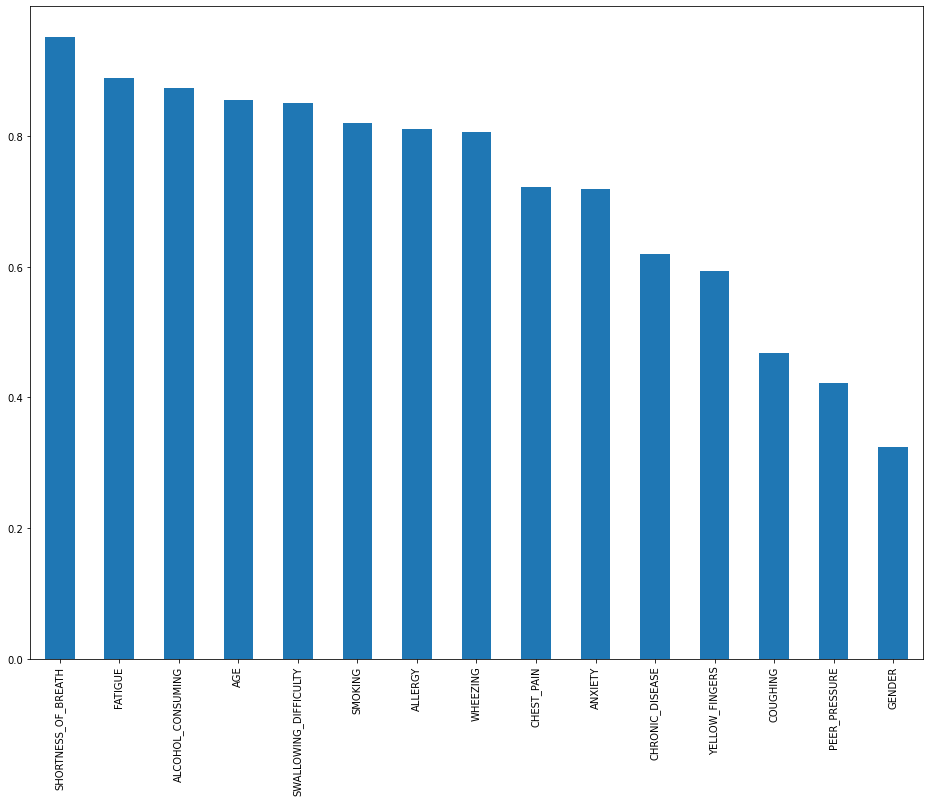

In [27]:
plt.figure(figsize=(16, 12))
p_values.plot.bar()

In [28]:
pred=lr.predict(x_test)

In [29]:
rf_pred=model.predict(x_test)

In [30]:
xgb_pred=xgb_model.predict(x_test)

In [31]:
Logistic_F_Score = lr_fit.score(x_test, y_test)
print('Logistic F Score:',lr_fit.score(x_test, y_test))


RandomForestClassifier_F_Score = model.score(x_test, y_test)
print('Random Forest Classifier F Score:',model.score(x_test, y_test))

XGBOOST_F_Score = xgb_model.score(x_test, y_test)
print('XGBOOST F Score:',xgb_model.score(x_test, y_test))

Logistic F Score: 0.5060023467822006
Random Forest Classifier F Score: 0.5066341727592742
XGBOOST F Score: 0.49697626139543283


In [32]:
confmatrix = metrics.confusion_matrix(y_test,pred)
print(confmatrix)

[[3665 1926]
 [3547 1941]]


In [33]:
rf_confmatrix = metrics.confusion_matrix(y_test,rf_pred)
print(rf_confmatrix)

[[2900 2691]
 [2775 2713]]


In [34]:
xgb_confmatrix = metrics.confusion_matrix(y_test,xgb_pred)
print(xgb_confmatrix)

[[3251 2340]
 [3233 2255]]


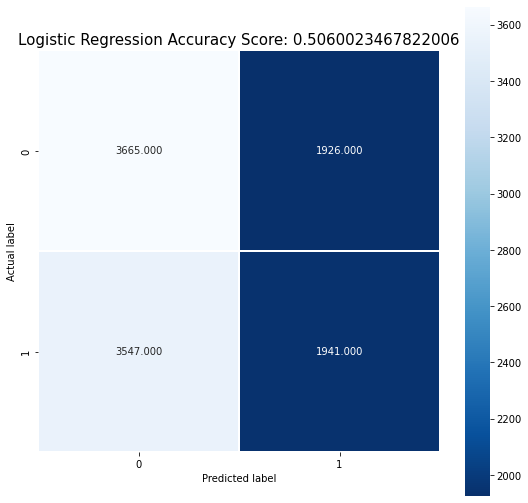

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(confmatrix, annot=True, fmt=".3f", linewidth=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Logistic Regression Accuracy Score: {0}'.format(Logistic_F_Score)
plt.title(all_sample_title, size = 15);

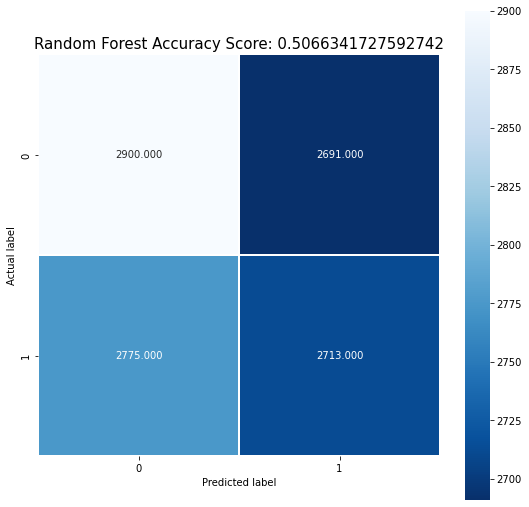

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(rf_confmatrix, annot=True, fmt=".3f", linewidth=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Random Forest Accuracy Score: {0}'.format(RandomForestClassifier_F_Score)
plt.title(all_sample_title, size = 15);

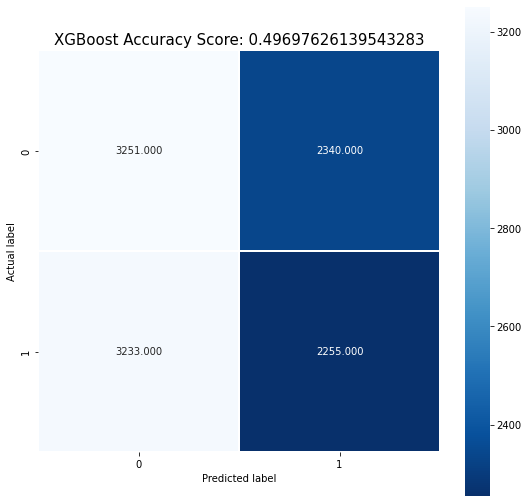

In [37]:
plt.figure(figsize=(9,9))
sns.heatmap(xgb_confmatrix, annot=True, fmt=".3f", linewidth=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='XGBoost Accuracy Score: {0}'.format(XGBOOST_F_Score)
plt.title(all_sample_title, size = 15);

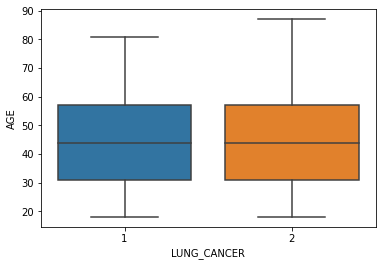

In [38]:
sns.boxplot(data=df,x='LUNG_CANCER',y='AGE')

In [39]:
df_AGE = df[['AGE']]
df_AGE['AGE_copy_1_percent'] = df_AGE[['AGE']]
df_AGE['AGE_copy_5_percent'] = df_AGE[['AGE']]
df_AGE['AGE_copy_10_percent'] = df_AGE[['AGE']]
df_AGE['sample_num'] = df_AGE[['AGE']]
df_AGE

<ipython-input-39-c6df1f236481>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AGE['AGE_copy_1_percent'] = df_AGE[['AGE']]
<ipython-input-39-c6df1f236481>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AGE['AGE_copy_5_percent'] = df_AGE[['AGE']]
<ipython-input-39-c6df1f236481>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,AGE,AGE_copy_1_percent,AGE_copy_5_percent,AGE_copy_10_percent,sample_num
0,69,69,69,69,69
1,74,74,74,74,74
2,59,59,59,59,59
3,63,63,63,63,63
4,63,63,63,63,63
...,...,...,...,...,...
55389,18,18,18,18,18
55390,60,60,60,60,60
55391,38,38,38,38,38
55392,26,26,26,26,26


In [40]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [41]:
print(get_percent_missing(df_AGE))

                             column_name  percent_missing
AGE                                  AGE              0.0
AGE_copy_1_percent    AGE_copy_1_percent              0.0
AGE_copy_5_percent    AGE_copy_5_percent              0.0
AGE_copy_10_percent  AGE_copy_10_percent              0.0
sample_num                    sample_num              0.0


In [42]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [43]:
create_missing(df_AGE, 0.01, 'AGE_copy_1_percent')
create_missing(df_AGE, 0.05, 'AGE_copy_5_percent')
create_missing(df_AGE, 0.1, 'AGE_copy_10_percent')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [44]:
print(get_percent_missing(df_AGE))

                             column_name  percent_missing
AGE                                  AGE         0.000000
AGE_copy_1_percent    AGE_copy_1_percent         1.000108
AGE_copy_5_percent    AGE_copy_5_percent         5.000542
AGE_copy_10_percent  AGE_copy_10_percent         9.999278
sample_num                    sample_num         0.000000


In [45]:
number_1_idx = list(np.where(df_AGE['AGE_copy_1_percent'].isna())[0])
number_5_idx = list(np.where(df_AGE['AGE_copy_5_percent'].isna())[0])
number_10_idx = list(np.where(df_AGE['AGE_copy_10_percent'].isna())[0])

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_AGE = pd.DataFrame(scaler.fit_transform(df_AGE))
df_AGE.head()

,0,1,2,3,4
0,0.739130,0.739130,0.739130,0.739130,0.739130
1,0.811594,0.811594,0.811594,NaN,0.811594
2,0.594203,0.594203,0.594203,NaN,0.594203
3,0.652174,0.652174,0.652174,0.652174,0.652174
4,0.652174,0.652174,0.652174,0.652174,0.652174


In [47]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_AGE = pd.DataFrame(imputer.fit_transform(df_AGE))

In [48]:
df_AGE.isnull().sum()
print('Values are filled with KNN Imputer successfully!')

Values are filled with KNN Imputer successfully!


In [49]:
print('Variance in 1% imputation column is - ', df_AGE[0].mean() - df_AGE[1].mean())
print('Variance in 5% imputation column is - ', df_AGE[0].mean() - df_AGE[2].mean())
print('Variance in 10% imputation column is - ', df_AGE[0].mean() - df_AGE[3].mean())

Variance in 1% imputation column is -  0.0
Variance in 5% imputation column is -  0.0
Variance in 10% imputation column is -  0.0


In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [51]:
log_reg = LinearRegression()
imp = IterativeImputer(estimator=log_reg,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
df=imp.fit_transform(df_AGE)

[IterativeImputer] Completing matrix with shape (55394, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.10
[IterativeImputer] Change: 0.0, scaled tolerance: 0.001 
[IterativeImputer] Early stopping criterion reached.


In [52]:
df_AGE.isnull().sum()
#print('\n Values are filled with MICE Imputer successfully!') -- check this

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [53]:
#pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [54]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [55]:
min_mem_size=6 
run_time=222

In [56]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [57]:
port_no=random.randint(5555,55555)
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:32775 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0gf9yoy6
  JVM stdout: /tmp/tmp0gf9yoy6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0gf9yoy6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:32775
Connecting to H2O server at http://127.0.0.1:32775 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_dfokx1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [58]:
hdf = h2o.import_file('RiskFactors.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [59]:
hdf.describe()

Rows:55394
Cols:16

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.502003827129292,44.137614182041325,1.4995306350868336,1.4962992381846407,1.5006137848864498,1.4967686030978076,1.5010470448062982,1.4979239628840675,1.5019135646459905,1.5010650973029576,1.4984474852872165,1.5050546990648797,1.500758204859733,1.49996389500668,1.5016427771960865,1.4961006607213776
maxs,1.0,87.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
sigma,0.5000004978097399,15.309217494376208,0.5000042928798124,0.4999908172360575,0.5000041364498418,0.49999407105604166,0.5000034168713465,0.5000002031976855,0.5000008514091558,0.5000033787414793,0.5000021028557717,0.49997896231916983,0.5000039383051423,0.5000045118816887,0.5000018144367121,0.49998930797001995
zeros,27586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,0.0,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
2,1.0,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0


In [60]:
pct_rows=0.80
hdf_train, hdf_test = hdf.split_frame([pct_rows])

In [61]:
print(hdf_train.shape)
print(hdf_test.shape)

(44358, 16)
(11036, 16)


In [62]:
hdf_train.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
1,61,2,2,2,2,2,2,1,2,1,2,2,2,1,1
0,72,1,1,1,1,2,2,2,2,2,2,2,1,2,1


In [63]:
X=hdf.columns
print(X)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']


In [64]:
y ='LUNG_CANCER'
#y_numeric ='churn_bit'
X.remove(y) 
#X.remove(y_numeric) 
print(X)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']


In [65]:
automl = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [66]:
automl.train(x=X,y=y,training_frame=hdf_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_1_20221215_232043


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    27                 27                          16977                  1            20           4.77778       1             533           45.7037

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.24994452612110046
RMSE: 0.49994452304340775
MAE: 0.4997784996836139
RMSLE: 0.2036789135592532
Mean Residual Deviance: 0.24994452612110046

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.2498651711576732
RMSE: 0.4998651529739528
MAE: 0.49975778176408486
RMSLE: 0.20364339825719294
Mean Residual Deviance: 0.2498651711576732

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.49977     5.54666e-05  0.499691      0.499748      0.499816      0.499829      0.499767
mean_residual_deviance  0.249872    4.9132e-05   0.249817      0.249843      0.249902      0.24994       0.249859
mse                     0.249872    4.9132e-05   0.249817      0.249843      0.249902      0.24994       0.249859
r2                      0.00044108  0.000205833  0.000725396   0.000502956   0.00035379    0.000163861   0.000459395
residual_deviance       0.249872    4.9132e-05   0.249817      0.249843      0.249902      0.24994       0.249859
rmse                    0.499872    4.91438e-05  0.499817      0.499843      0.499902      0.49994       0.499859
rmsle                   0.203648    8.6219e-05   0.203502      0.203706      0.203637      0.203695      0.203699

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2022-12-15 23:23:20  10.184 sec  0                  nan              nan             nan
    2022-12-15 23:23:20  10.324 sec  5                  0.501185         0.499671        0.251186
    2022-12-15 23:23:20  10.479 sec  10                 0.500253         0.4997          0.250253
    2022-12-15 23:23:20  10.638 sec  15                 0.499988         0.499691        0.249988
    2022-12-15 23:23:20  10.792 sec  20                 0.49993          0.499715        0.24993
    2022-12-15 23:23:21  10.947 sec  25                 0.499949         0.499758        0.249949
    2022-12-15 23:23:21  10.992 sec  27                 0.499945         0.499778        0.249945

Variable Importances: 
variable               relative_importance    scaled_importance    percentage
---------------------  ---------------------  -------------------  ------------
AGE                    276.045                1                    0.385698
FATIGUE                51.4333                0.186322             0.0718639
ALLERGY                43.3249                0.156948             0.0605346
SWALLOWING_DIFFICULTY  40.2387                0.145769             0.0562226
GENDER                 39.2127                0.142052             0.054789
YELLOW_FINGERS         34.215                 0.123947             0.047806
COUGHING               30.8159                0.111633             0.0430567
CHEST_PAIN             28.865                 0.104566             0.0403309
SHORTNESS_OF_BREATH    28.3246                0.102609             0.0395759
CHRONIC_DISEASE        27.1979                0.0985272            0.0380017
PEER_PRESSURE          26.5252              

In [67]:
print(automl.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
XRT_1_AutoML_1_20221215_232043                           0.499865  0.249865  0.499758  0.203643                  0.249865
GBM_grid_1_AutoML_1_20221215_232043_model_2              0.499969  0.249969  0.499687  0.203739                  0.249969
StackedEnsemble_AllModels_1_AutoML_1_20221215_232043     0.49997   0.24997   0.499941  0.203747                  0.24997
StackedEnsemble_BestOfFamily_2_AutoML_1_20221215_232043  0.499985  0.249985  0.499955  0.203753                  0.249985
StackedEnsemble_BestOfFamily_3_AutoML_1_20221215_232043  0.499992  0.249992  0.499973  0.203756                  0.249992
StackedEnsemble_BestOfFamily_1_AutoML_1_20221215_232043  0.500005  0.250005  0.499981  0.203761                  0.250005
GLM_1_AutoML_1_20221215_232043                           0.500006  0.250006  0.499942  0.203761                  0.250006
StackedEnsemble_AllModels

In [68]:
model_index=0
glm_index=0
glm_model=''
automl_leaderboard_df=automl.leaderboard.as_data_frame()
models_dict={}
for m in automl_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in automl_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'XRT_1_AutoML_1_20221215_232043': 0, 'GLM_1_AutoML_1_20221215_232043': 6}

In [69]:
print(model_index)
best_model = h2o.get_model(automl.leaderboard[model_index,'model_id'])

0


In [70]:
best_model.algo

'drf'

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

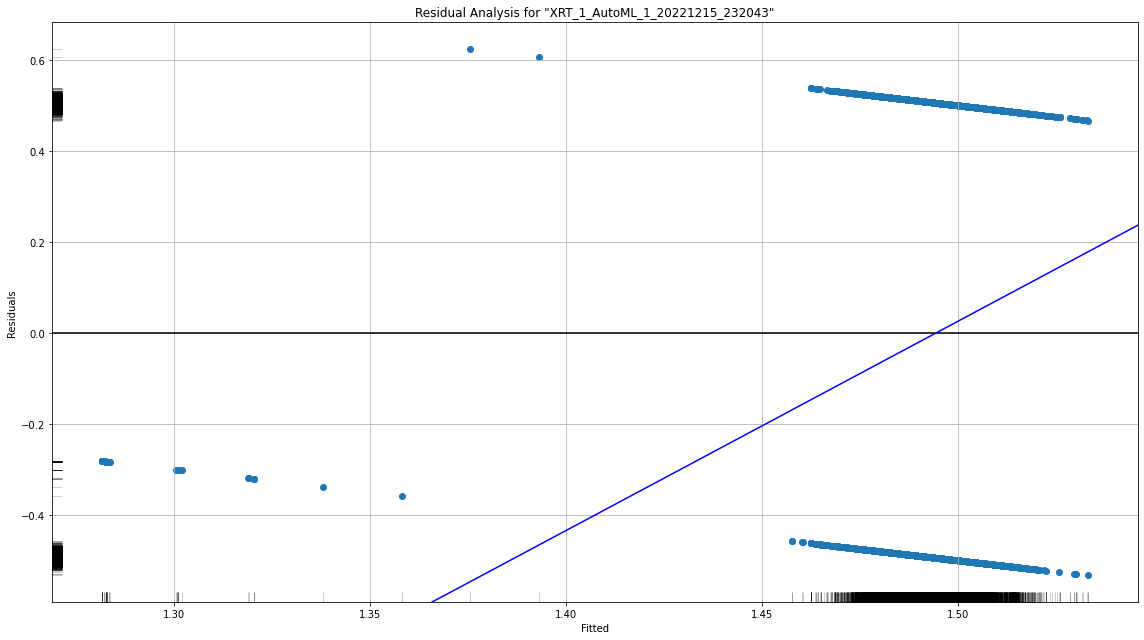

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

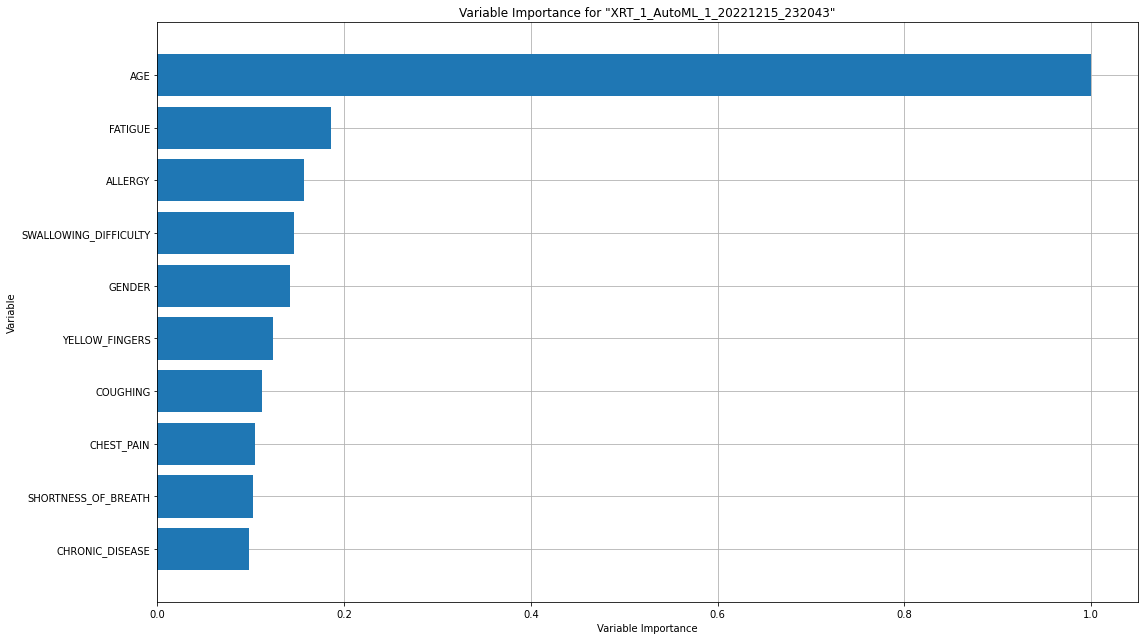

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

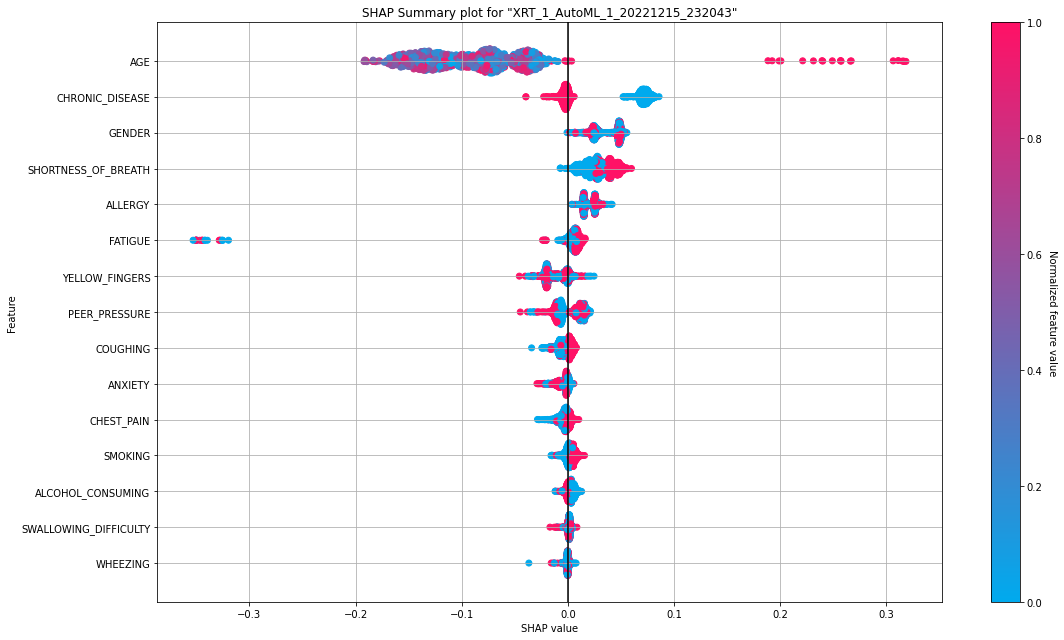

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

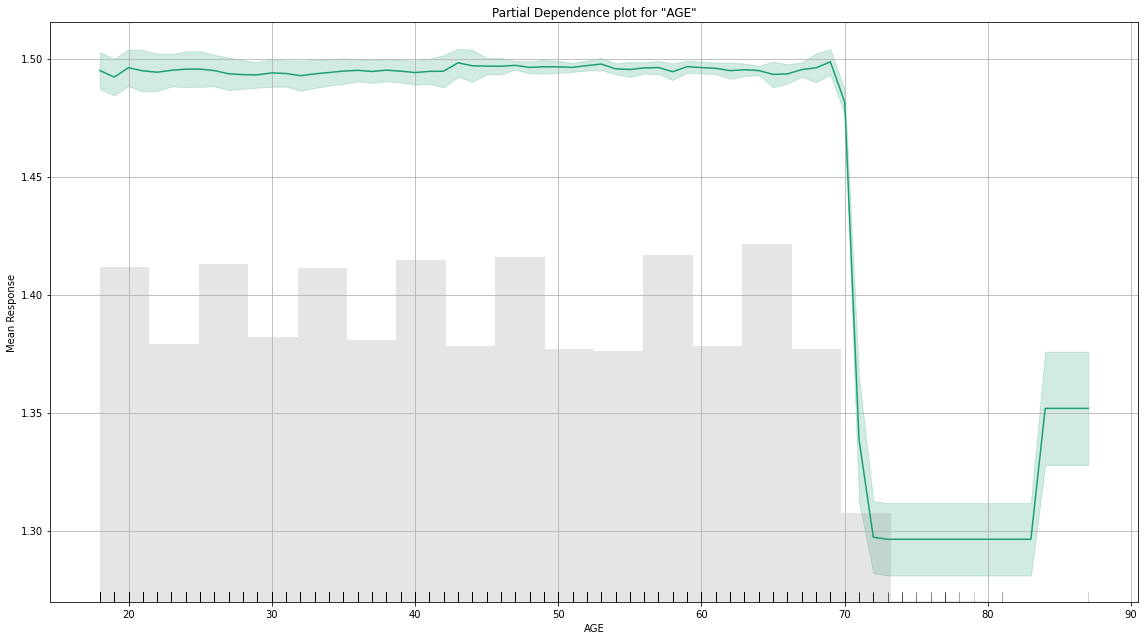

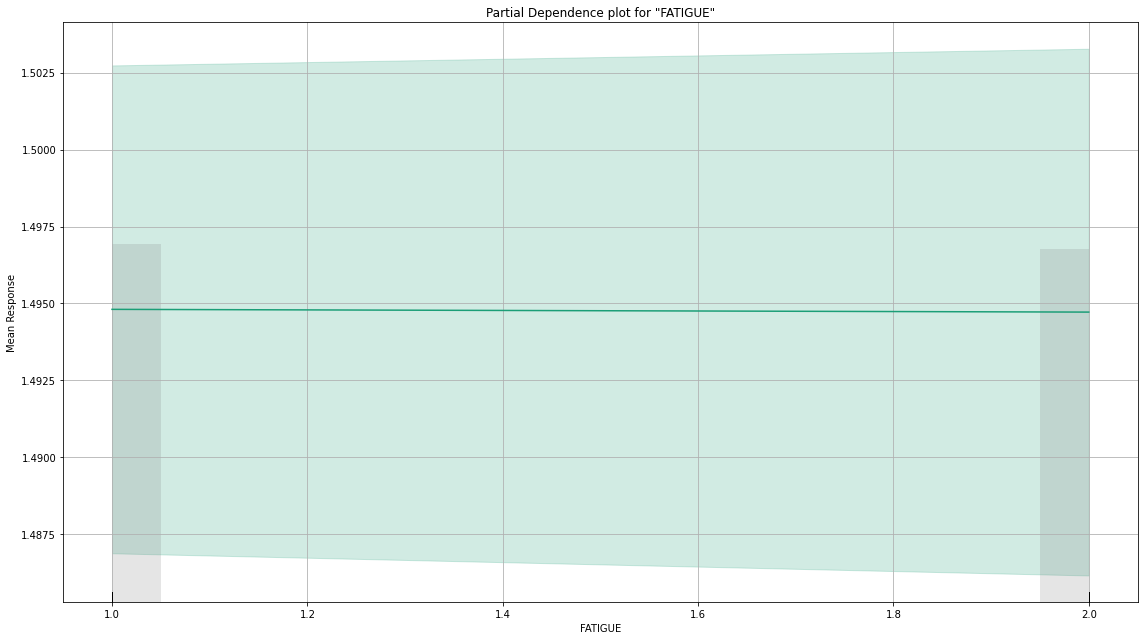

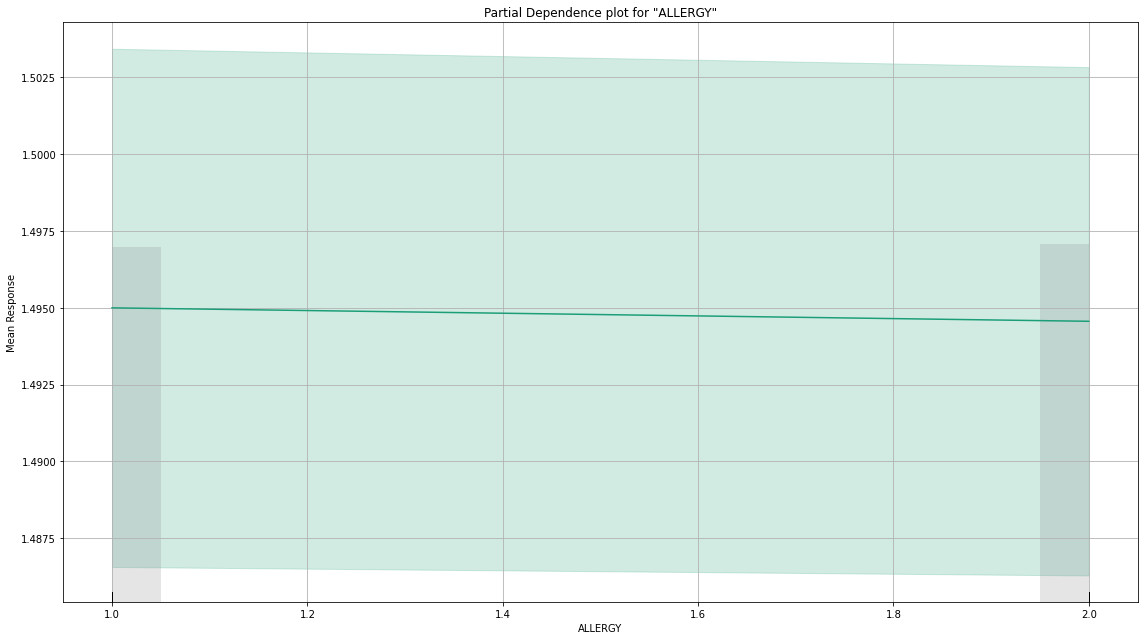

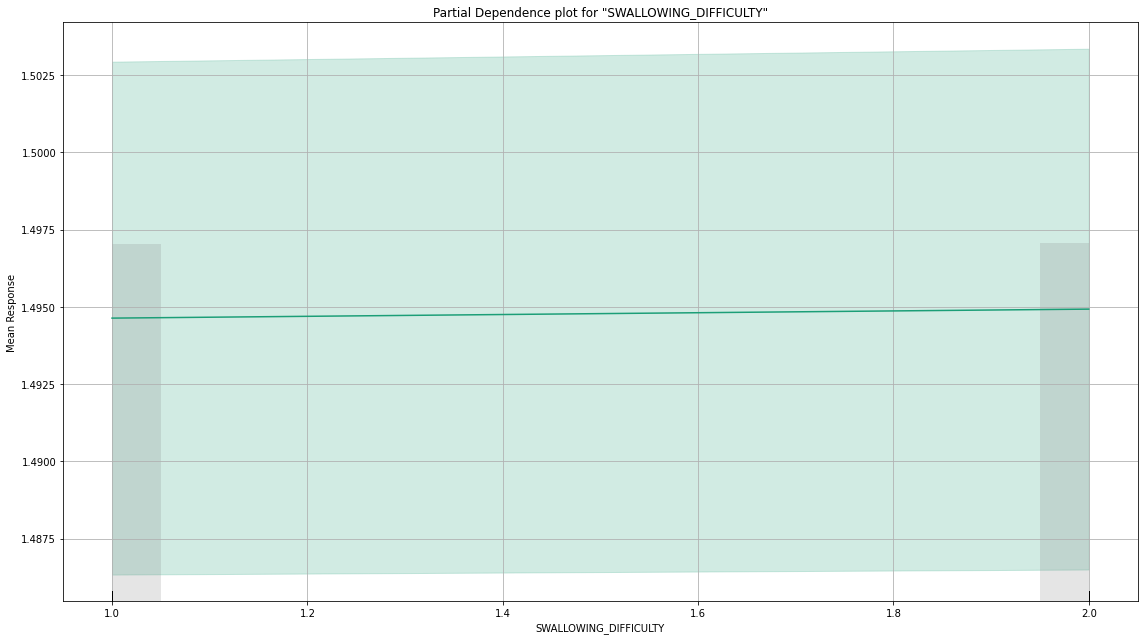

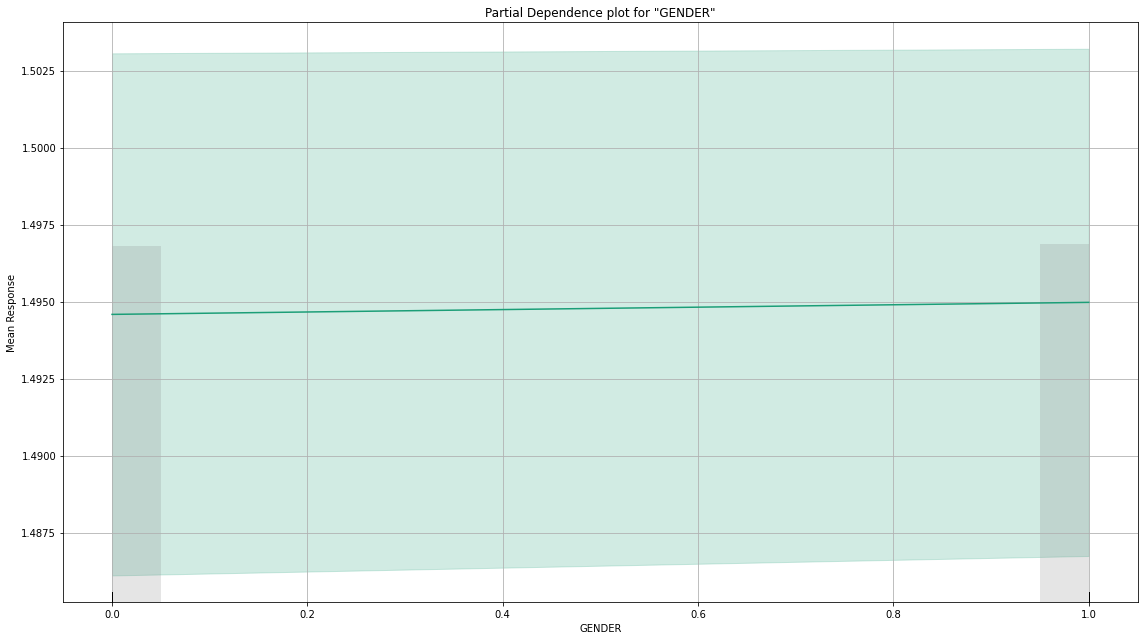

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

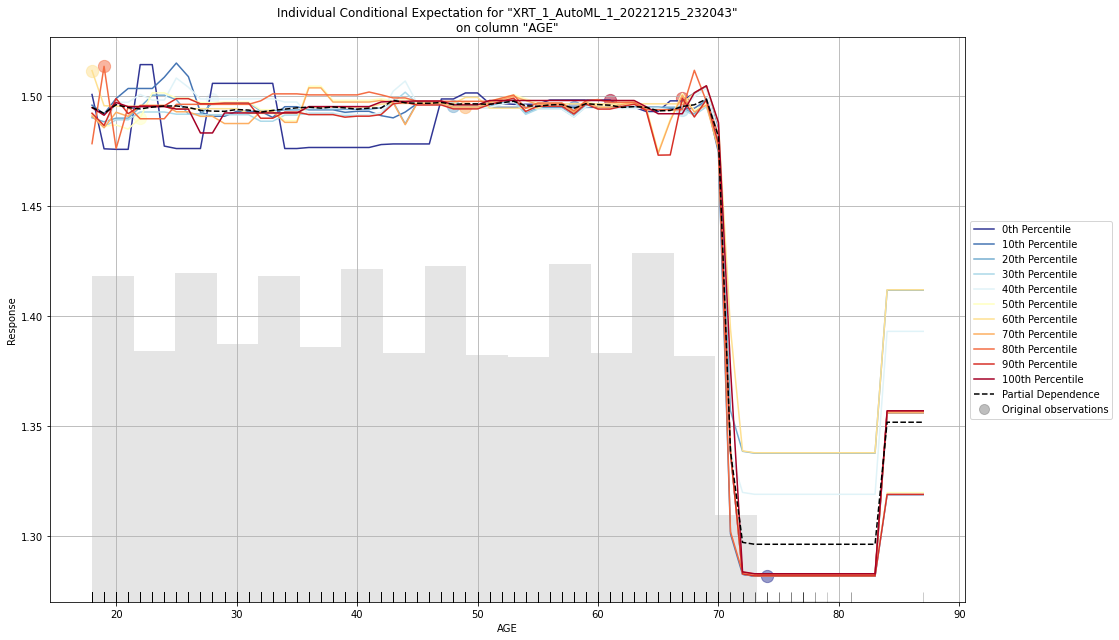

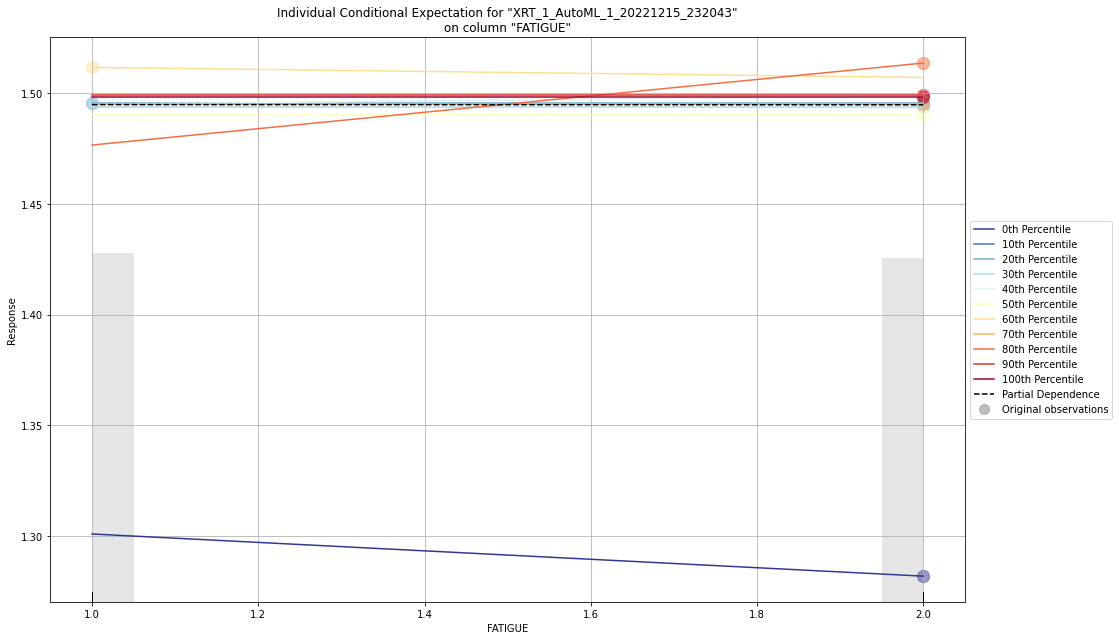

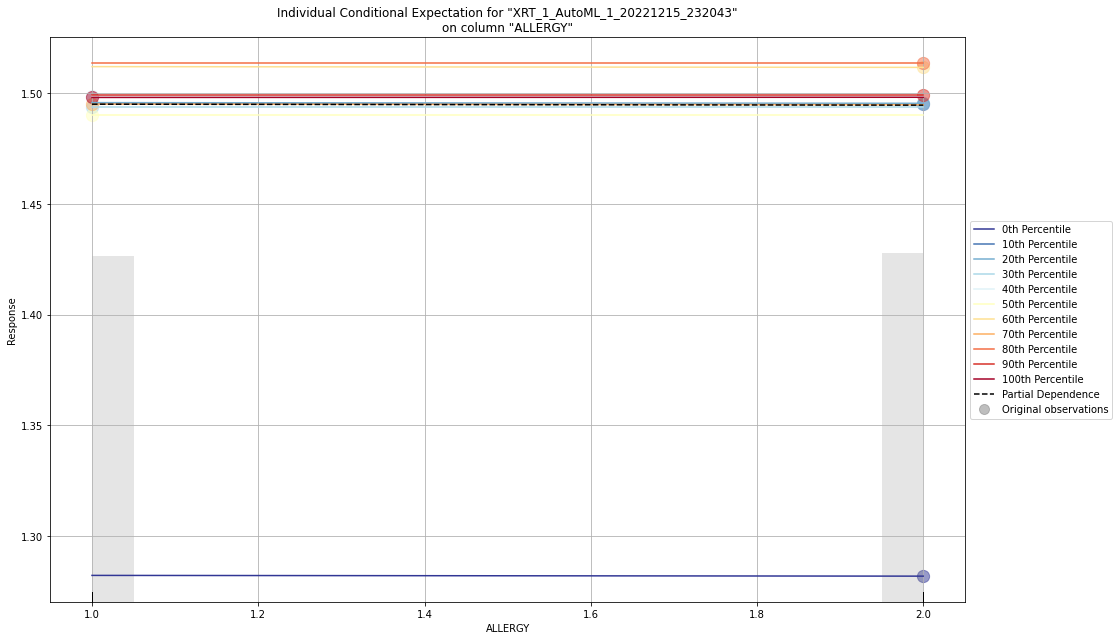

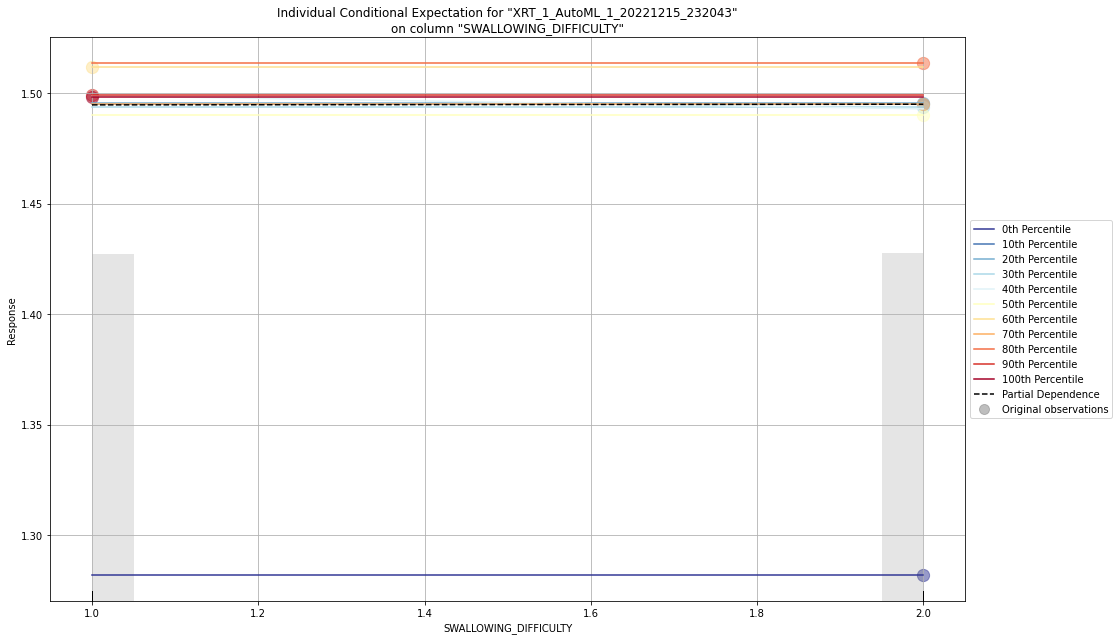

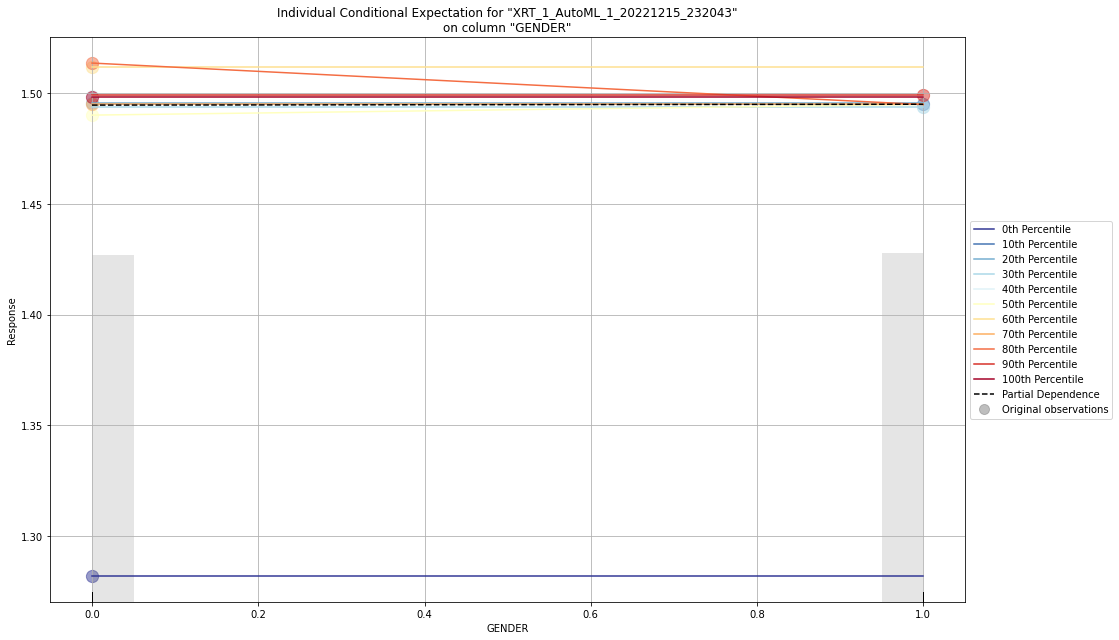

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [71]:
best_model.explain(hdf_train)

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

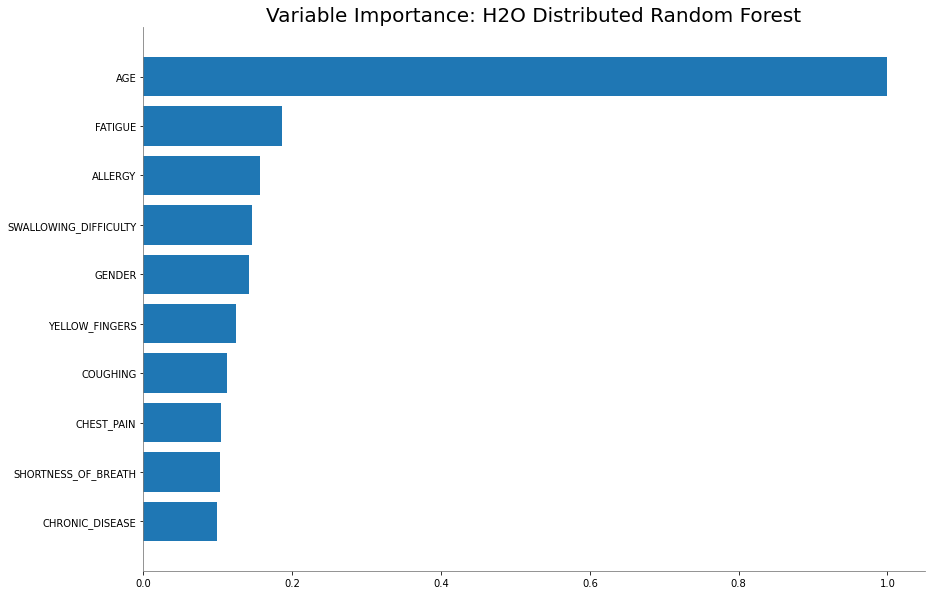

<Figure size 432x288 with 0 Axes>

In [73]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-74-939d9c667a95>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


6
glm


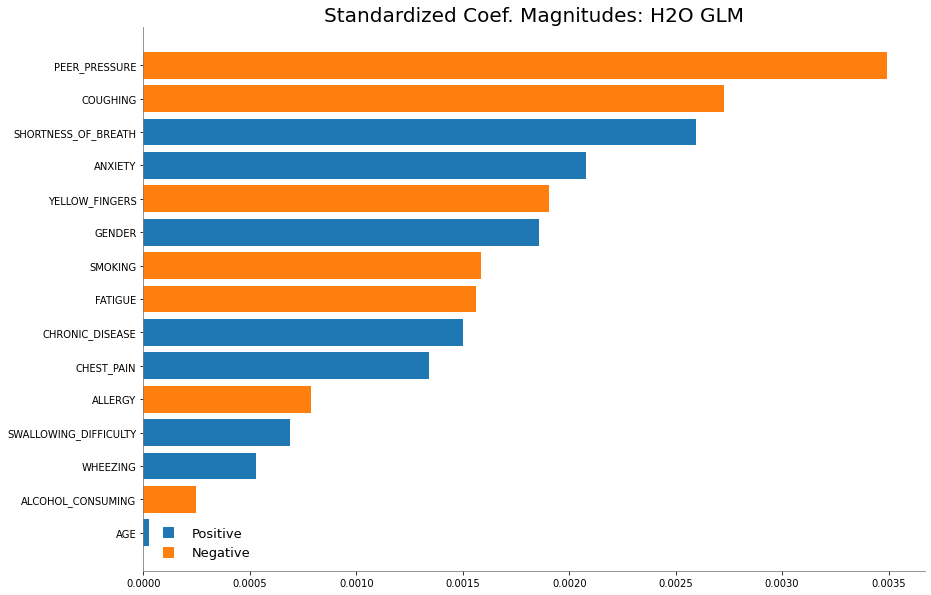

In [74]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(automl.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [75]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [76]:
model_perf=best_model.model_performance(hdf_test)
stats_test={}
stats_test=model_performance_stats(model_perf)
stats_test

{'mse': 0.2500030603284283,
 'rmse': 0.5000030603190627,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [77]:
prediction = best_model.predict(hdf_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

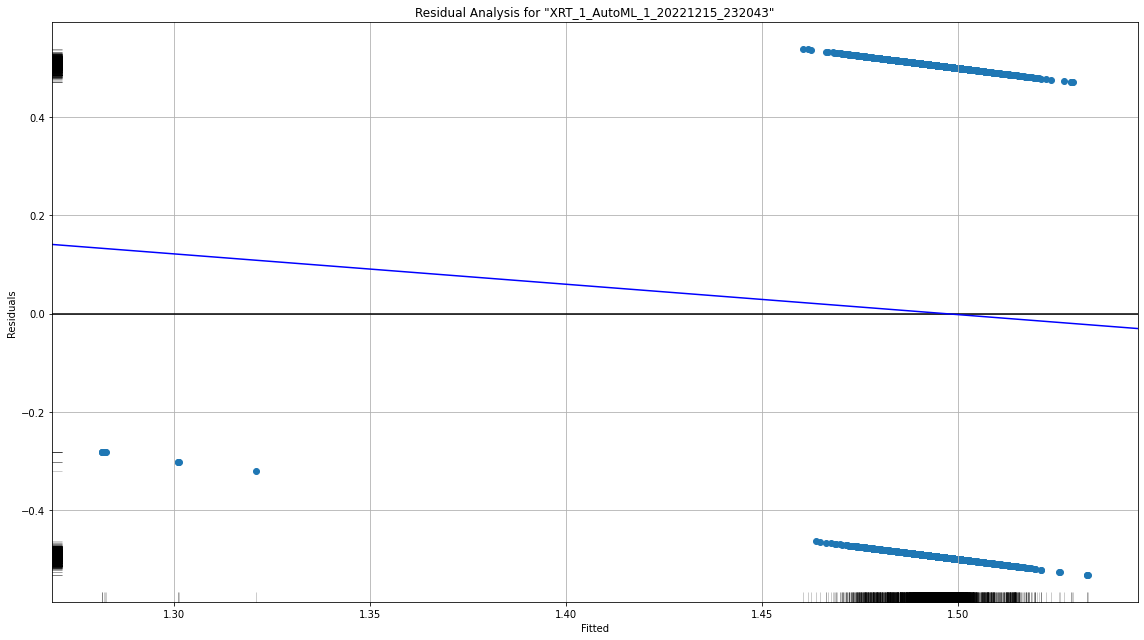

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

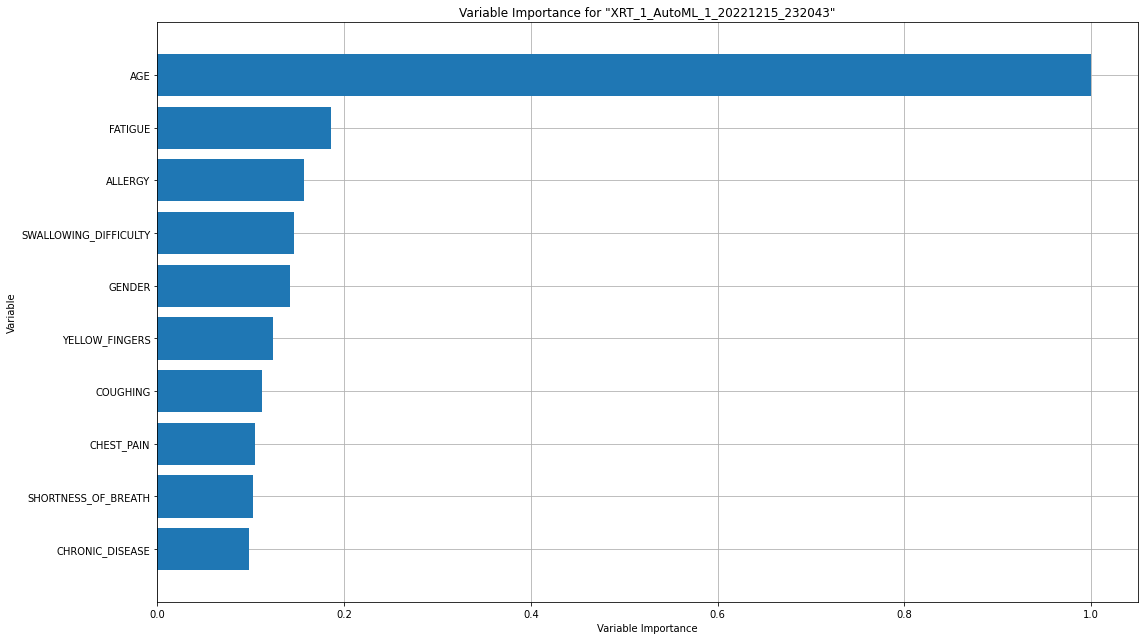

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

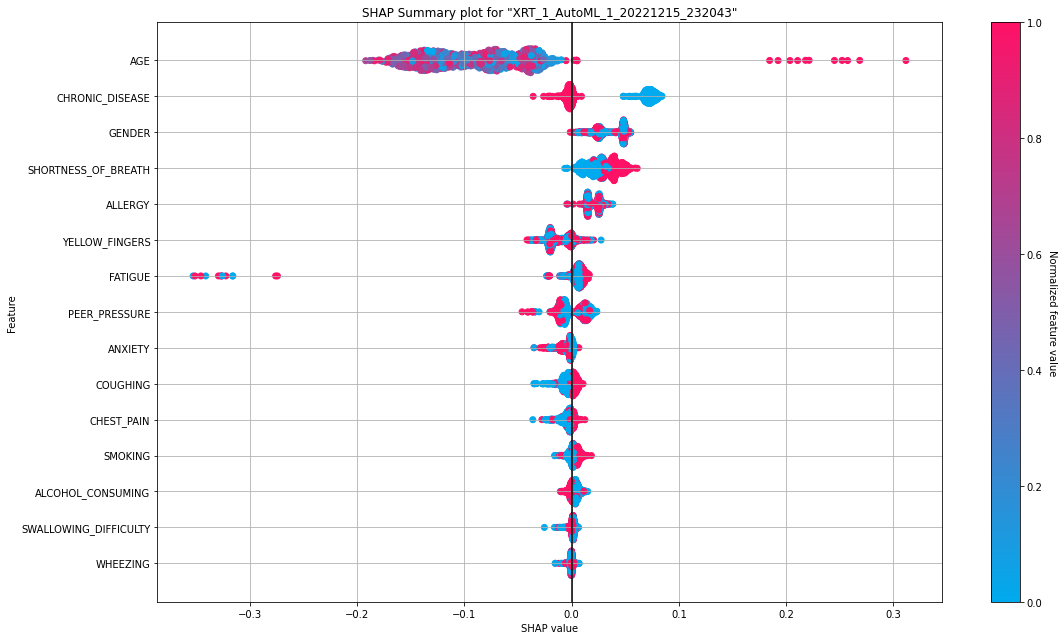

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

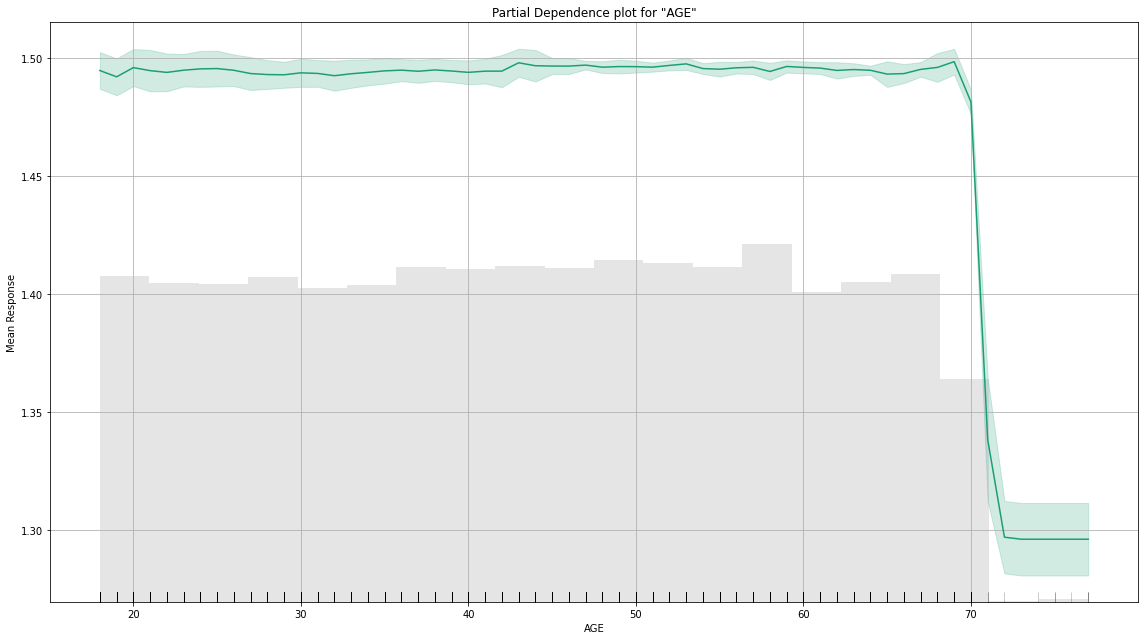

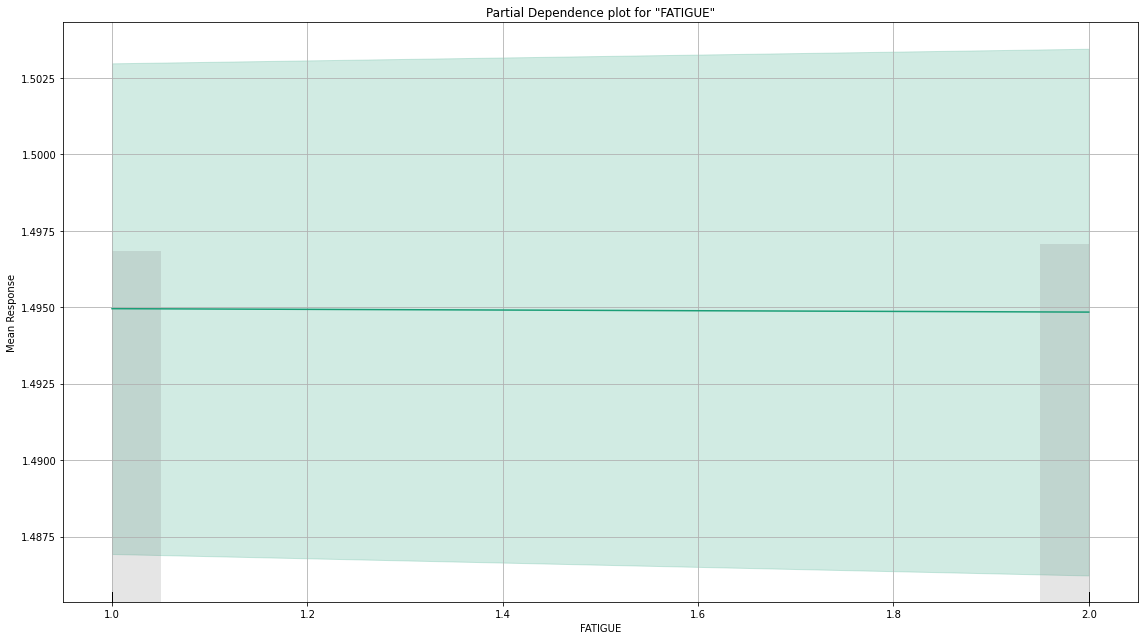

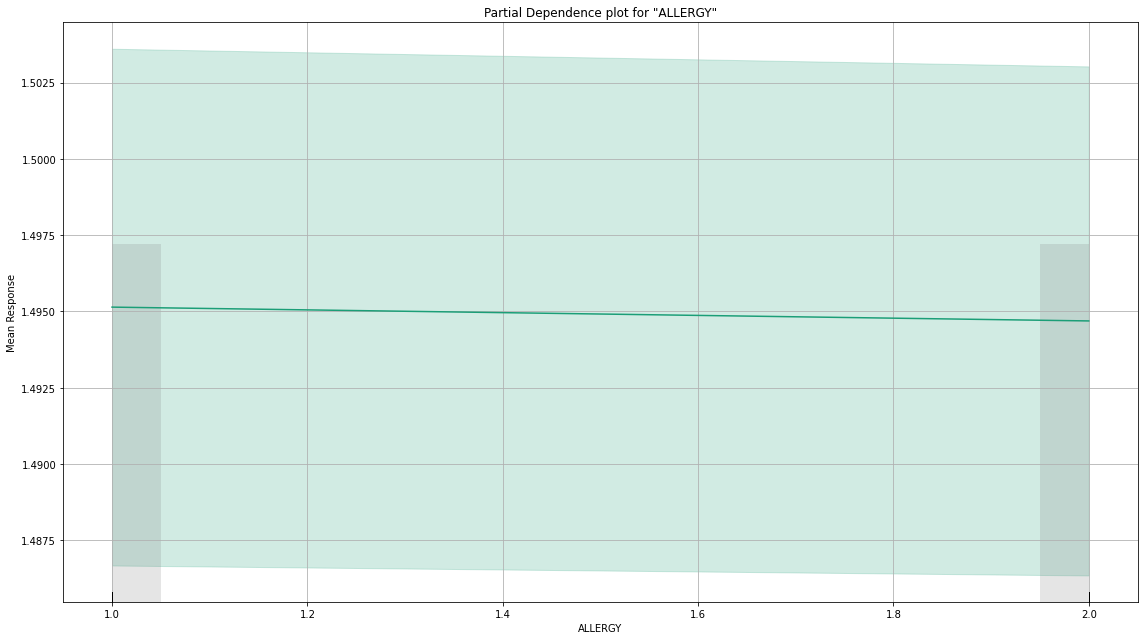

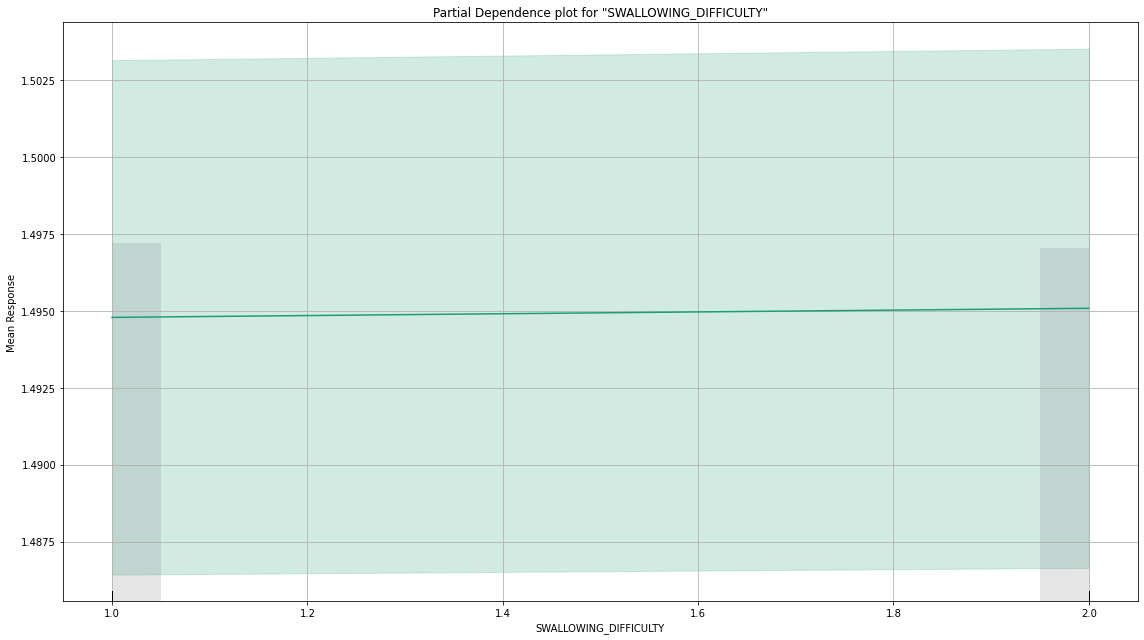

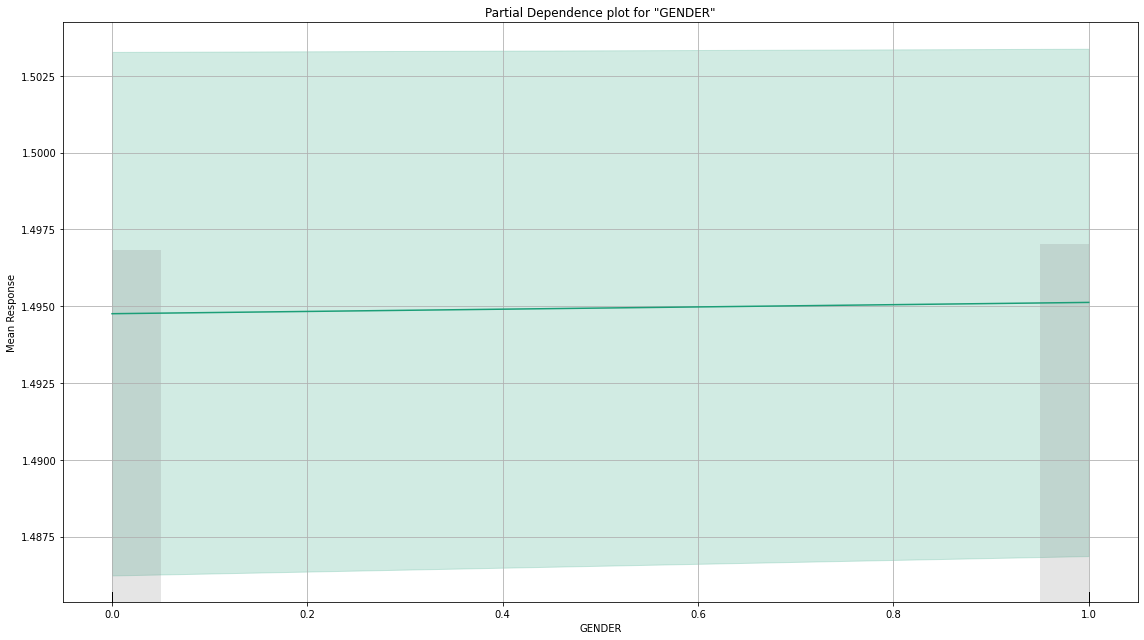

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

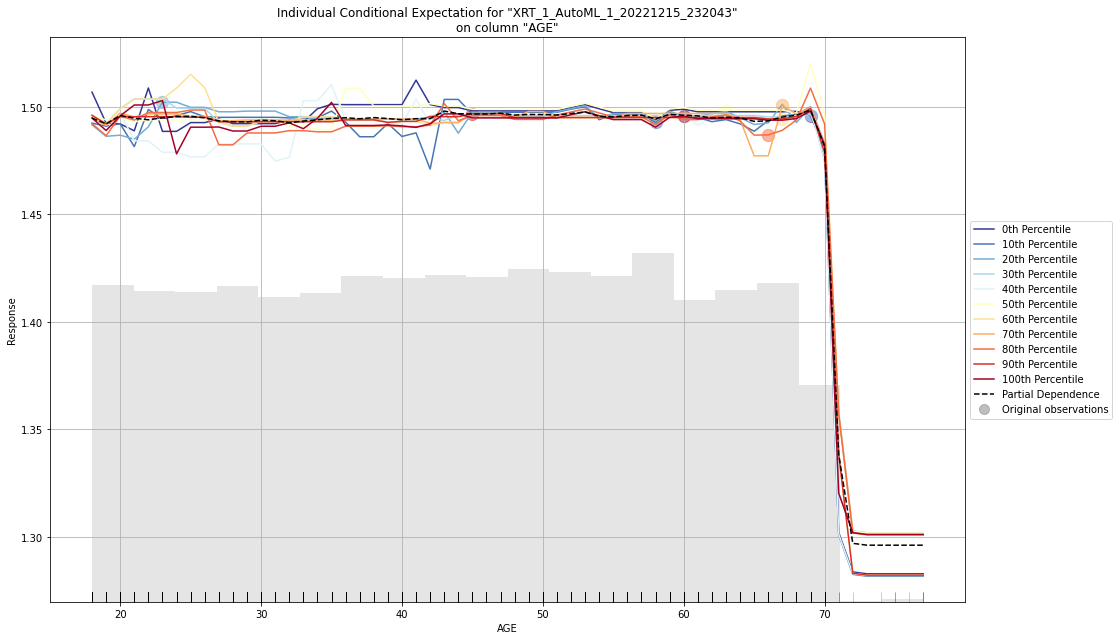

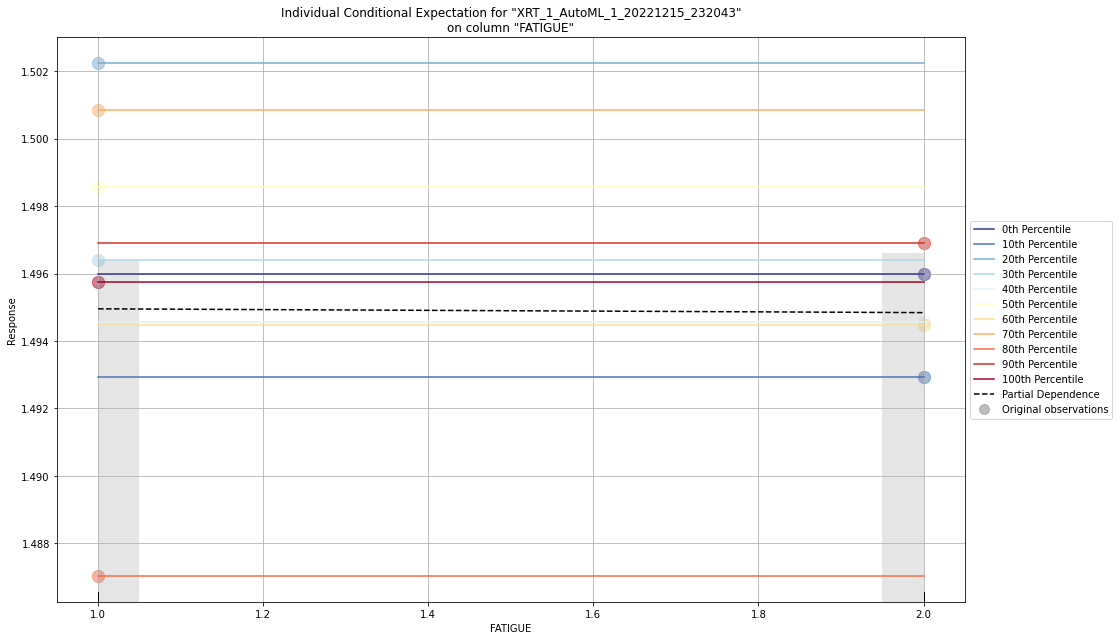

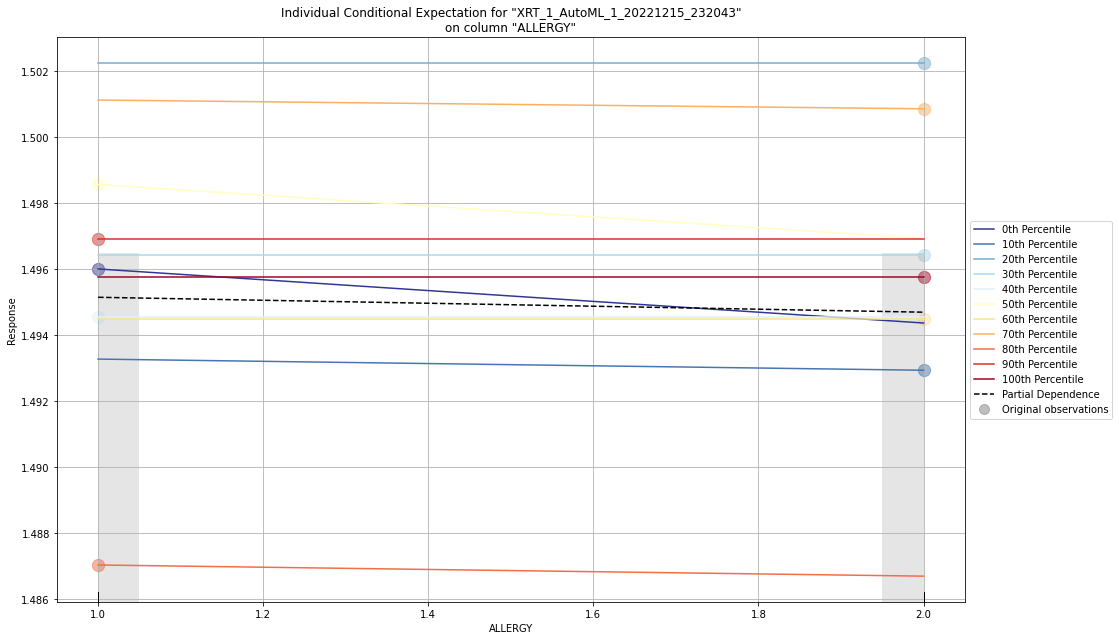

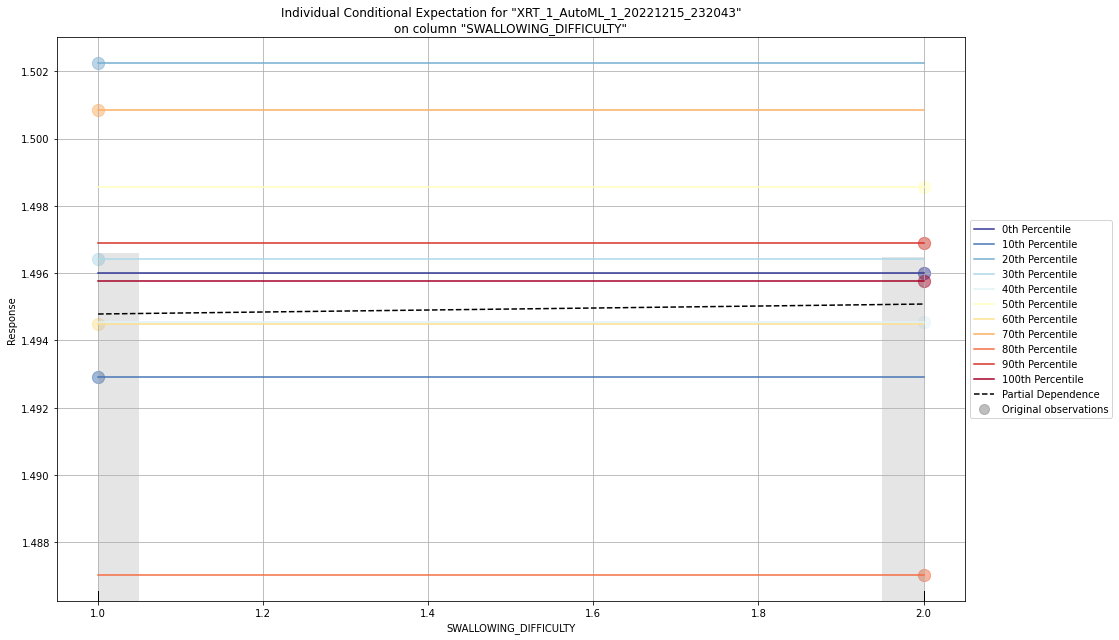

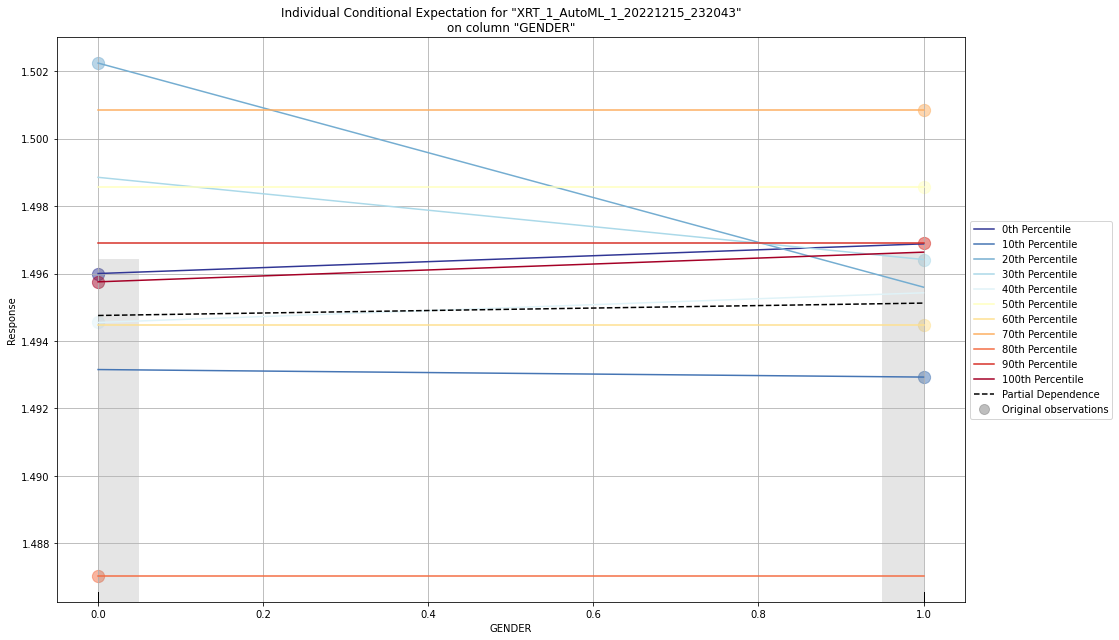

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [78]:
best_model.explain(hdf_test)

In [79]:
y_pred=h2o.as_list(prediction)
y_pred[0:5]

,predict
0,1.496000
1,1.496470
2,1.497867
3,1.491352
4,1.496940


In [80]:
y_test=h2o.as_list(hdf_test[y])
y_test[0:5]

,LUNG_CANCER
0,1
1,1
2,2
3,1
4,1


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.8/dist-packages/h2o/model/model_base.py:1298: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


[PartialDependence: Partial Dependence Plot of model XRT_1_AutoML_1_20221215_232043 on column 'GENDER'.
gender    mean_response    stddev_response    std_error_mean_response
--------  ---------------  -----------------  -------------------------
0         1.49462          0.00848535         3.60527e-05
1         1.49501          0.00823886         3.50055e-05,
 PartialDependence: Partial Dependence Plot of model XRT_1_AutoML_1_20221215_232043 on column 'AGE'.
age      mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
18       1.49492          0.00780972         3.31821e-05
21.6316  1.49461          0.00862542         3.66479e-05
25.2632  1.49511          0.00752571         3.19754e-05
28.8947  1.4931           0.00546364         2.3214e-05
32.5263  1.49387          0.00703447         2.98882e-05
36.1579  1.49503          0.00466864         1.98362e-05
39.7895  1.49409          0.00510648         2.16965e-0

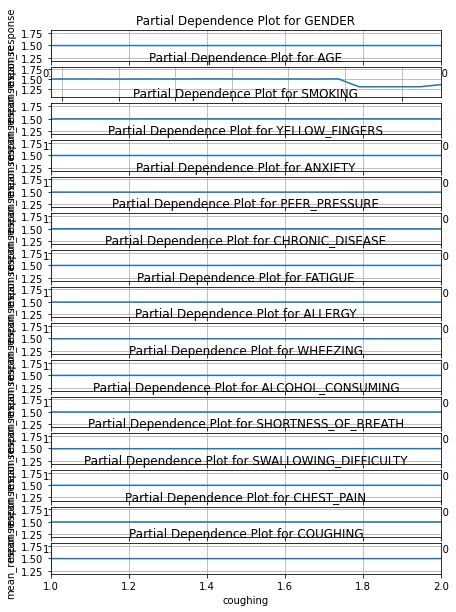

In [81]:
best_model.partial_plot(hdf, cols=['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN','COUGHING',])

In [82]:
cf = pd.read_csv('RiskFactors.csv')

In [83]:
cf.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,-0.001740,-0.001729,0.000571,-0.001521,-0.002682,-0.003619,-0.003991,-0.003843,0.002699,-0.008436,0.000032,-0.008383,0.002744,0.004211,0.007253
AGE,-0.001740,1.000000,-0.001042,0.001289,0.002827,-0.000269,0.008720,0.003498,-0.003469,0.001161,-0.003461,-0.000948,-0.003281,0.005846,0.001377,-0.003676
SMOKING,-0.001729,-0.001042,1.000000,0.000571,-0.000901,0.002882,-0.009999,0.002379,0.001556,-0.004981,-0.001844,-0.001615,0.001337,0.009568,-0.002019,-0.003004
YELLOW_FINGERS,0.000571,0.001289,0.000571,1.000000,0.007880,-0.001384,0.001099,-0.004977,0.002917,0.006118,0.003804,-0.003536,0.004272,-0.001950,0.000999,-0.002730
ANXIETY,-0.001521,0.002827,-0.000901,0.007880,1.000000,0.004918,0.001189,-0.003461,-0.004807,-0.002025,-0.002487,-0.008642,-0.001699,0.008629,-0.008886,0.004595
PEER_PRESSURE,-0.002682,-0.000269,0.002882,-0.001384,0.004918,1.000000,0.001819,-0.002229,-0.000481,0.000194,0.003735,-0.001018,-0.002373,0.007726,-0.002398,-0.008138
CHRONIC_DISEASE,-0.003619,0.008720,-0.009999,0.001099,0.001189,0.001819,1.000000,0.003403,0.005661,-0.003398,0.008563,-0.003307,0.006532,-0.001913,-0.001018,0.005324
FATIGUE,-0.003991,0.003498,0.002379,-0.004977,-0.003461,-0.002229,0.003403,1.000000,-0.003956,0.003006,-0.002685,0.000114,0.003906,0.000072,-0.005944,-0.000466
ALLERGY,-0.003843,-0.003469,0.001556,0.002917,-0.004807,-0.000481,0.005661,-0.003956,1.000000,-0.004991,-0.000241,-0.008163,0.001041,-0.005885,-0.003262,-0.001739
WHEEZING,0.002699,0.001161,-0.004981,0.006118,-0.002025,0.000194,-0.003398,0.003006,-0.004991,1.000000,0.006000,0.001567,0.004763,-0.001227,0.002412,0.000305


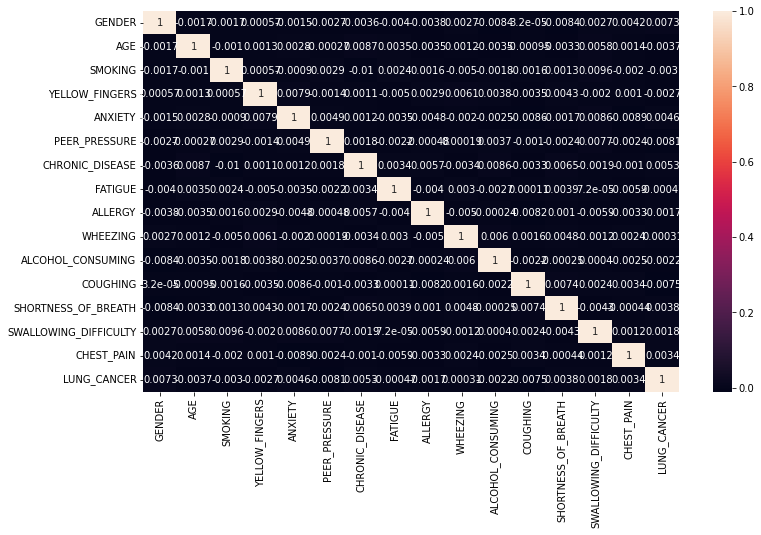

In [84]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(cf.corr(),annot= True)

In [85]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

lungcancer_pval = H2OGeneralizedLinearEstimator(family = 'AUTO', lambda_ = 0, remove_collinear_columns = False, compute_p_values = True)

In [86]:
predictors = ["GENDER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC_DISEASE","FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"]
response = "LUNG_CANCER"

# initialize your estimator
lungcancer_pval.train(x = predictors, y = response, training_frame = hdf_train, validation_frame = hdf_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1671146430838_21


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              15                            15                             1                       py_2_sid_9d38

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.2498710164657153
RMSE: 0.4998709998246701
MAE: 0.49974203293143044
RMSLE: 0.2037064965423661
Mean Residual Deviance: 0.2498710164657153
R^2: 0.0004551191549758693
Null degrees of freedom: 44357
Residual degrees of freedom: 44342
Null deviance: 11088.825285179104
Residual deviance: 11083.778548386199
AIC: 64400.41392895861

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.25017769286984815
RMSE: 0.5001776613063084
MAE: 0.5000475323464404
RMSLE: 0.20382557837054385
Mean Residual Deviance: 0.25017769286984815
R^2: -0.0007715441703670667
Null degrees of freedom: 11035
Residual degrees of freedom: 11020
Null deviance: 2758.832457567012
Residual deviance: 2760.9610185116444
AIC: 16061.50802326917

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2            validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  ---------------------  ------------------  ---------------------  ------------------  ----------------------
    2022-12-15 23:27:11  0.000 sec   0             11088.825285179104         0.24998478933178014
    2022-12-15 23:27:11  0.251 sec   1                                                             0.4998709998246701  0.2498710164657153   0.49974203293143044  0.0004551191549758693  0.5001776613063084  0.25017769286984815    0.5000475323464404  -0.0007715441703670667

Variable Importances: 
variable               relative_importance    scaled_importance    percentage
---------------------  ---------------------  -------------------  ------------
PEER_PRESSURE          0.00538128             1                    0.152308
COUGHING               0.00419684             0.779896             0.118784
SHORTNESS_OF_BREATH    0.00402754             0.748434             0.113992
ANXIETY                0.00319092             0.592966             0.0903132
YELLOW_FINGERS         0.00295912             0.54989              0.0837524
GENDER                 0.00284653             0.528968             0.0805658
SMOKING                0.00242148             0.449981             0.0685355
FATIGUE                0.00241918             0.449555             0.0684705
CHRONIC_DISEASE        0.00230996             0.429258             0.0653792
CHEST_PAIN             0.00207055             0.384769             0.0586032
ALLERGY                0.00121161             0.225152             0.0342924
SWALLOWING_DIFFICULTY  0.00107448             0.19967              0.0304113
WHEEZING               0.000803273            0.149272             0.0227352
ALCOHOL_CONSUMING      0.00036808             0.0684001            0.0104178
AGE                    5.08698e-05            0.0094531            0.00143978

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [87]:
coeff_tab = lungcancer_pval._model_json['output']['coefficients_table']

In [88]:
coeff_tab.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,1.509478,0.026752,56.425314,0.000000,1.496100
1,GENDER,0.005693,0.004748,1.198991,0.230538,0.002847
2,AGE,0.000003,0.000155,0.021427,0.982905,0.000051
3,SMOKING,-0.004843,0.004749,-1.019841,0.307810,-0.002421
4,YELLOW_FINGERS,-0.005918,0.004748,-1.246374,0.212634,-0.002959
5,ANXIETY,0.006382,0.004749,1.343763,0.179032,0.003191
6,PEER_PRESSURE,-0.010763,0.004748,-2.266756,0.023410,-0.005381
7,CHRONIC_DISEASE,0.004620,0.004749,0.972842,0.330637,0.002310
8,FATIGUE,-0.004838,0.004748,-1.018949,0.308233,-0.002419
9,ALLERGY,-0.002423,0.004749,-0.510291,0.609850,-0.001212


In [89]:
lung_regularization = H2OGeneralizedLinearEstimator(family = 'AUTO', lambda_ = .1, alpha = 0)

In [90]:
lung_regularization.train(x = X, y = y, training_frame = hdf_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1671146430838_22


GLM Model: summary
    family    link      regularization          number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.1 )  15                            15                             1                       py_2_sid_9d38

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.24987196897768335
RMSE: 0.499871952581542
MAE: 0.4997628517449322
RMSLE: 0.2037071330136074
Mean Residual Deviance: 0.24987196897768335
R^2: 0.00045130887527600194
Null degrees of freedom: 44357
Residual degrees of freedom: 44342
Null deviance: 11088.825285179104
Residual deviance: 11083.820799912079
AIC: 64400.583021980856

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -----------------  -------------------  ------------------  ----------------------
    2022-12-15 23:27:12  0.000 sec   0             11088.825285179104         0.24998478933178014
    2022-12-15 23:27:12  0.083 sec   1                                                             0.499871952581542  0.24987196897768335  0.4997628517449322  0.00045130887527600194

Variable Importances: 
variable               relative_importance    scaled_importance    percentage
---------------------  ---------------------  -------------------  ------------
PEER_PRESSURE          0.00489098             1                    0.152393
COUGHING               0.0038141              0.779822             0.118839
SHORTNESS_OF_BREATH    0.00365419             0.747127             0.113857
ANXIETY                0.00290023             0.592975             0.0903653
YELLOW_FINGERS         0.0026829              0.548539             0.0835935
GENDER                 0.00259003             0.529552             0.0807
SMOKING                0.00220335             0.450491             0.0686517
FATIGUE                0.00219734             0.449264             0.0684647
CHRONIC_DISEASE        0.00209961             0.429282             0.0654196
CHEST_PAIN             0.00188019             0.384419             0.0585827
ALLERGY                0.00110039             0.224983             0.0342859
SWALLOWING_DIFFICULTY  0.000972369            0.198808             0.030297
WHEEZING               0.000728516            0.148951             0.022699
ALCOHOL_CONSUMING      0.000337293            0.0689623            0.0105094
AGE                    4.30727e-05            0.00880655           0.00134206

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [91]:
lung_regularization.train(x = X, y = y, training_frame = hdf_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1671146430838_23


GLM Model: summary
    family    link      regularization          number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.1 )  15                            15                             1                       py_3_sid_9d38

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.24967440897222204
RMSE: 0.4996743028936169
MAE: 0.49940026257395803
RMSLE: 0.20362642670184017
Mean Residual Deviance: 0.24967440897222204
R^2: 0.0012417136769078407
Null degrees of freedom: 11035
Residual degrees of freedom: 11020
Null deviance: 2758.83245741205
Residual deviance: 2755.4067774174423
AIC: 16039.284477741774

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  ---------------------
    2022-12-15 23:27:12  0.000 sec   0             2758.83245741205           0.24998481854041774
    2022-12-15 23:27:12  0.035 sec   1                                                             0.4996743028936169  0.24967440897222204  0.49940026257395803  0.0012417136769078407

Variable Importances: 
variable               relative_importance    scaled_importance    percentage
---------------------  ---------------------  -------------------  ------------
AGE                    0.00842932             1                    0.17391
FATIGUE                0.00774431             0.918735             0.159777
GENDER                 0.00595579             0.706556             0.122877
SHORTNESS_OF_BREATH    0.0056302              0.66793              0.11616
YELLOW_FINGERS         0.00410987             0.487569             0.0847932
CHRONIC_DISEASE        0.00388441             0.460821             0.0801415
ALCOHOL_CONSUMING      0.0035824              0.424993             0.0739107
WHEEZING               0.00229764             0.272577             0.047404
SMOKING                0.00186363             0.221089             0.0384496
COUGHING               0.00171122             0.203008             0.0353052
ANXIETY                0.00102275             0.121333             0.021101
PEER_PRESSURE          0.000945041            0.112114             0.0194977
CHEST_PAIN             0.000516095            0.0612262            0.0106479
SWALLOWING_DIFFICULTY  0.000497252            0.0589907            0.0102591
ALLERGY                0.000279429            0.0331497            0.00576507

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

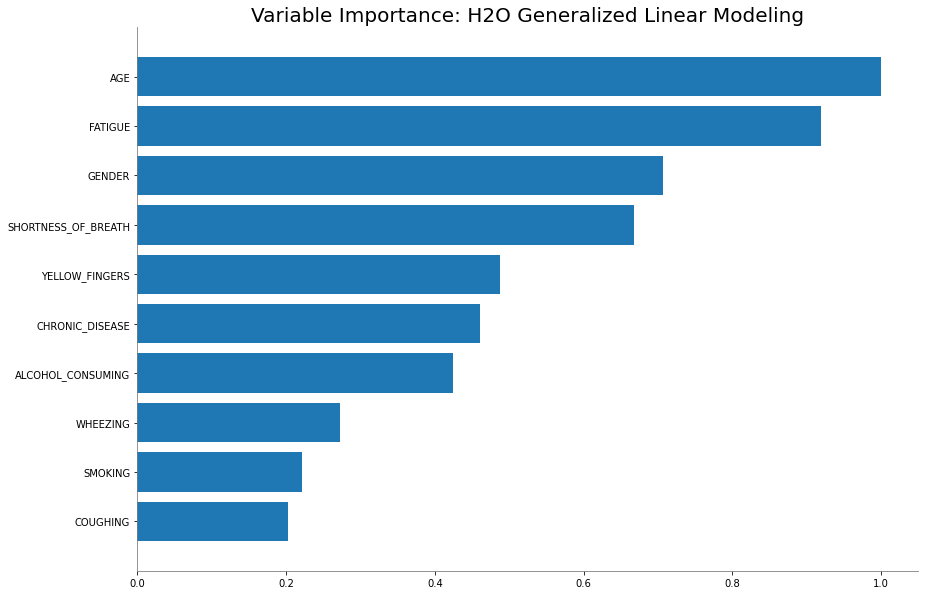

<Figure size 432x288 with 0 Axes>

In [92]:
lung_regularization.varimp_plot()

In [93]:
import pandas as pd
#numerical combination
import numpy as np 
#plotting data and create visualization
import matplotlib.pyplot as plt           
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance

In [94]:
#!pip install shap

In [95]:
import shap

In [97]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [100]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
GENDER,0.026970
CHRONIC_DISEASE,0.024235
ANXIETY,0.017757
CHEST_PAIN,0.017647
WHEEZING,0.012452
SMOKING,0.011638
SWALLOWING_DIFFICULTY,0.009756
SHORTNESS_OF_BREATH,0.003864
AGE,-0.000028
FATIGUE,-0.005585


In [101]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
GENDER,1.027337
CHRONIC_DISEASE,1.024531
ANXIETY,1.017915
CHEST_PAIN,1.017804
WHEEZING,1.012530
SMOKING,1.011706
SWALLOWING_DIFFICULTY,1.009804
SHORTNESS_OF_BREATH,1.003871
AGE,0.999972
FATIGUE,0.994431


In [102]:
xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(x_train, y_train)

XGBClassifier()

In [104]:
preds = xgb_cl.predict(x_test)

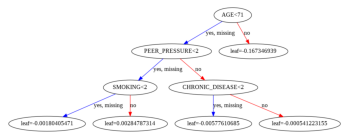

In [107]:
xgb.plot_tree(xgb_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

In [108]:
xgb.plot_tree(xgb_cl,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

In [109]:
xgb.plot_tree(xgb_cl,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

In [110]:
lg_explainer = shap.Explainer(logreg, x_train)
shap_values_lg = lg_explainer(x_test)

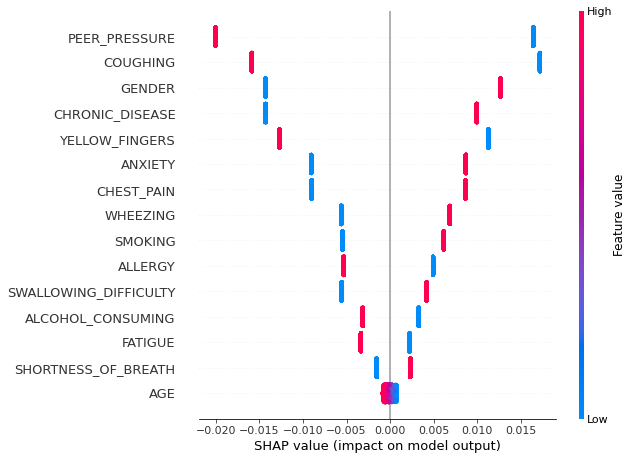

In [111]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

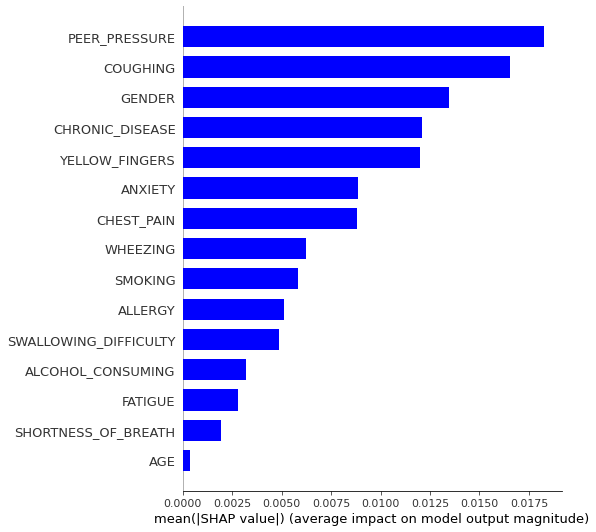

In [112]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='blue')

In [113]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

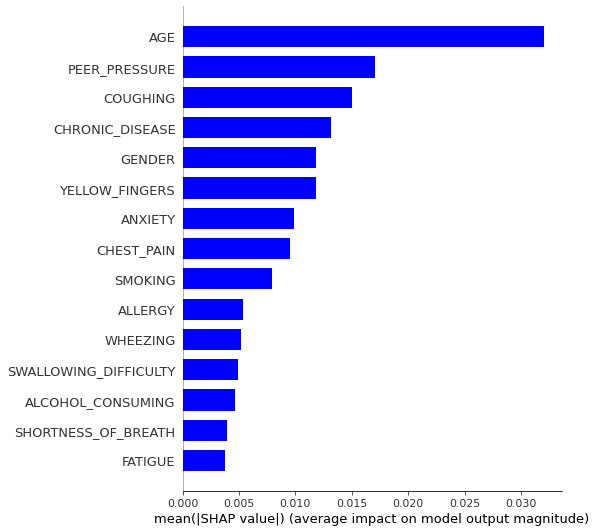

In [114]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='blue')

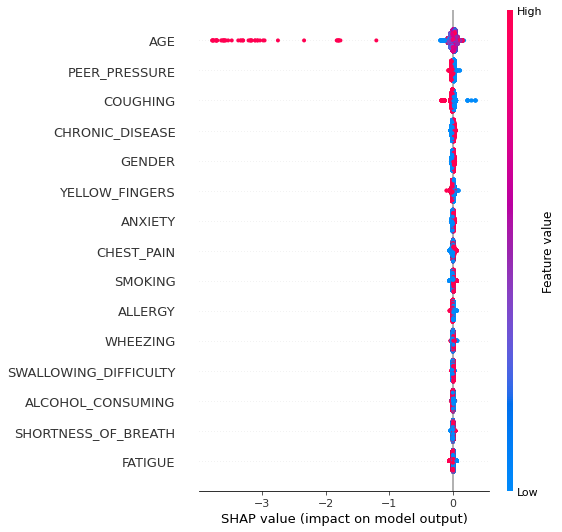

In [115]:
shap.summary_plot(shap_values, x_train)